# 0. Ligand Poses (Blind Docking)
The [Ligand Poses challenge](https://polarishub.io/competitions/asap-discovery/antiviral-ligand-poses-2025) of the [ASAP Discovery competition](https://polarishub.io/competitions/asap-discovery/antiviral-admet-2025) is a little more complex than the other challenges. 

The goal in ligand pose challenge is to predict the 3D binding pose of the ligand, given the ligand's SMILES (or CXSMILES, to be more precise) and the protein's sequence. This is also known as _blind docking_.

Let's take a look!

## Load the competition
Make sure you're logged in! If you haven't logged in yet, simply run `polaris login` in a terminal of your choice. 

In [3]:
import polaris as po

competition = po.load_competition("asap-discovery/antiviral-ligand-poses-2025")

[2025-03-13 22:19:11] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=602649;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=743232;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.8).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=380974;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=999553;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

Let's again cache it as suggested!

In [4]:
competition.cache()

[22:19:18] Copying to destination                                                                      ]8;id=375290;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=809846;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py#380\380]8;;\
           /home/xchen/.cache/polaris/datasets/2172e171-98df-49cc-ade8-0df87e33b6a0/data.zarr                      

           For large Zarr archives, this may take a while.                                             ]8;id=593884;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=39731;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py#381\381]8;;\

[22:21:36]  Success: Copying Zarr keys                                                                ]8;id=789852;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=564108;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=960134;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=496718;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/xchen/.cache/polaris/datasets/2172e171-98df-49cc-ade8-0df87e33b6a0'

In [5]:
train, test = competition.get_train_test_split()

In [6]:
len(train),len(test)

(770, 195)

In [7]:
for itest in test: # Train data structure
    print(itest['Protein Label'])

MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
MERS-CoV Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 Mpro
SARS-CoV-2 M

# 1. regularize the train and test sets

The raw data is already downloaded in raw_data_package

## Load data

In [8]:
# Train data
from pathlib import Path
path = Path("./raw_data_package") / "ligand-posing"
subdir = list(path.iterdir())
#Files are subdir
complexPDB = str(subdir[0])+"/complex.pdb"
print(complexPDB)

raw_data_package/ligand-posing/SARS-CoV-2_Mpro-P0765_0A_CONFIDENTIAL/complex.pdb


In [9]:
len(subdir)

772

In [10]:
# Ref_data
ref_MERS_PDB = str(Path("./reference_structures"))+'/MERS-CoV-Mpro/protein.pdb'
ref_SARS_PDB = str(Path("./reference_structures"))+'/SARS-CoV-2-Mpro/protein.pdb'
print(ref_MERS_PDB,ref_SARS_PDB)

reference_structures/MERS-CoV-Mpro/protein.pdb reference_structures/SARS-CoV-2-Mpro/protein.pdb


## Rotate the traindataset with ref and create new files

In [84]:
import pymol

def rotate(ref_file, move_dir):
    pymol.cmd.delete("all")
    
    pymol.cmd.load(move_dir+'/complex.pdb', "mobile")
    pymol.cmd.load(ref_path, "reference")

    # Compute the RMSD
    pymol.cmd.rms_cur("mobile", "reference")
    
    
    # Now let's align our proteins again using PyMol
    pymol.cmd.align(
        "polymer and name CA and mobile",
        "polymer and name CA and reference",
        quiet=0,
    );
    pymol.cmd.rms_cur("mobile", "reference")
    pymol.cmd.save(move_dir+"/rotated.pdb", "mobile")



In [85]:
path = './raw_data_package/ligand-posing/SARS-CoV-2_Mpro-x11294_0A_CONFIDENTIAL/'
rotate(ref_SARS_PDB, path)

 Match: read scoring matrix.
 Match: assigning 556 x 552 pairwise scores.
 MatchAlign: aligning residues (556 vs 552)...
 MatchAlign: score 1314.500
 ExecutiveAlign: 540 atoms aligned.
 ExecutiveRMS: 29 atoms rejected during cycle 1 (RMSD=2.30).
 ExecutiveRMS: 31 atoms rejected during cycle 2 (RMSD=1.46).
 ExecutiveRMS: 17 atoms rejected during cycle 3 (RMSD=1.19).
 ExecutiveRMS: 18 atoms rejected during cycle 4 (RMSD=1.10).
 ExecutiveRMS: 10 atoms rejected during cycle 5 (RMSD=1.02).
 Executive: RMSD =    0.981 (435 to 435 atoms)


In [ ]:
for i in range(len(subdir)):
    path = str(subdir[i])
    if('SARS' in path):
        rotate(ref_SARS_PDB, path)

## Prepare the test-set

Hypothesis: Conservative Mutations 

In [11]:
import os
import shutil

def process_protein_labels(test, reference_file_MERS, reference_file_SARS, output_dir):

    os.makedirs(output_dir, exist_ok=True)  
    i = 0
    for itest in test:
        protein_label = itest['Protein Label']
        folder_path = os.path.join(output_dir, str(i))
        os.makedirs(folder_path, exist_ok=True)
        i=i+1
        # If MERS, just copy the reference file 
        if protein_label == 'MERS-CoV Mpro':
            #print(itest['CXSMILES'])
            shutil.copy(reference_file_MERS, folder_path)

        # If SARS, just copy the reference file 
        elif protein_label == 'SARS-CoV-2 Mpro':
            #print(itest['CXSMILES'])
            shutil.copy(reference_file_SARS, folder_path)


reference_file_path = "reference"  
output_directory = "output_folders"  


process_protein_labels(test, ref_MERS_PDB, ref_SARS_PDB, './test_data')


In [12]:
# Print all smiles
for itest in test:
    print(itest['CXSMILES'])


O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncncn1
COc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccncn2)c2cc(Cl)ccc2C1=O
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2[NH3+])c2cc(Cl)ccc2C1=O
O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1ccnnc1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ccncn1
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnn(C)c2)c2cc(Cl)ccc2C1=O
Cc1cnc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(F)ccc3C2=O)cn1
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC(C)C)c2cc(Cl)ccc2C1=O
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nccn1C)C(=O)c1ccc(F)cc12
C[C@H]1c2ccsc2CCN1C(=O)Cc1cncc2ccccc12
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC#N)C(=O)c1ccc(F)cc12
CCC(=O)[N@H+]1CCCc2c(N(Cc3cccc(Cl)c3)C(=O)Cc3cncc4ccccc34)cccc21
C=C(CN(C(=O)[C@@H]1CN(CC(=O)NC)C(=O)c2ccc(Cl)cc21)c1cncc2ccccc12)C(=O)[O-]
O=C(Cc1cncc2ccccc12)N1CCCCC1
CCC1CCN(C(=O)Cc2cncc3ccccc23)CC1
CCS(=O)(=O)N1CC2(C1)C(=O)N(c1cncc3ccccc13)C(=O)N2C
CNC(=O

# 2. Analyze the training set

In [13]:
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
def calculate_centroid(atom_coords):
    """Calculate the centroid of a given set of atom coordinates."""
    return np.mean(atom_coords, axis=0)

def get_ligand_and_binding_site(pdb_file, ligand_resname="UNK", cutoff=4.0):
    """Extract ligand centroid and nearby binding site residues from a PDB file."""
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("complex", pdb_file)

    ligand_atoms = []
    protein_residues = []

    for model in structure:
        for chain in model:
            for residue in chain:
                if residue.id[0] == " ":
                    protein_residues.append(residue)
                elif residue.resname == ligand_resname:
                    for atom in residue:
                        ligand_atoms.append(atom.coord)

    if not ligand_atoms:
        raise ValueError(f"Ligand {ligand_resname} not found in the PDB file.")

    centroid = calculate_centroid(np.array(ligand_atoms))
    
    binding_residues = set()
    for residue in protein_residues:
        for atom in residue:
            if np.linalg.norm(atom.coord - centroid) < cutoff:
                binding_residues.add((residue.resname, residue.id[1], residue.parent.id))

    return centroid, sorted(binding_residues, key=lambda x: x[1])
    
def plot_centroids(centroids):
    """Plot ligand centroids in 3D space."""
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*[(c[0], c[1], c[2]) for c in centroids])
    ax.scatter(x, y, z, c='r', marker='o', label="Ligand Centroids")

    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.set_title("Ligand Centroid Positions")

    plt.legend()
    plt.show()

In [14]:

# Example usage

centroids = []
SARS_docking_residues = []
MERS_docking_residues = []
for i in range(len(subdir)):
    path = str(subdir[i])
    if("SARS" in path): 
        pdb_file = path+"/rotated.pdb"  # Replace with your actual PDB file
        centroid, binding_site = get_ligand_and_binding_site(pdb_file)
        centroids.append(centroid)
        SARS_docking_residues = SARS_docking_residues + binding_site
    elif("MERS" in path):
        pdb_file = path+"/rotated.pdb"  # Replace with your actual PDB file
        centroid, binding_site = get_ligand_and_binding_site(pdb_file)
        centroids.append(centroid)
        MERS_docking_residues = MERS_docking_residues + binding_site
    else:
        continue


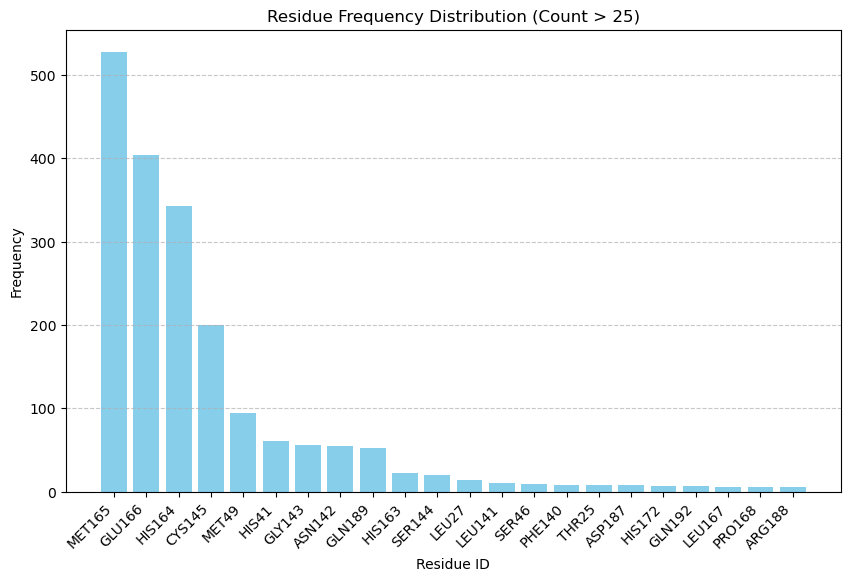

In [15]:
from collections import Counter

# 
formatted_residues = [f"{res[0]}{res[1]}" for res in SARS_docking_residues]

# 
formatted_counts = Counter(formatted_residues)

filtered_counts = {k: v for k, v in sorted(formatted_counts.items(), key=lambda item: item[1], reverse=True) if v > 5}

# 
plt.figure(figsize=(10, 6))
plt.bar(filtered_counts.keys(), filtered_counts.values(), color='skyblue')
plt.xlabel('Residue ID')
plt.ylabel('Frequency')
plt.title('Residue Frequency Distribution (Count > 25)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
print(len(SARS_docking_residues))

2002


In [17]:
print(len(MERS_docking_residues))

0


# 3. Docking

In [21]:
import os
import subprocess
import glob
import re
from vina import Vina

def run_vina_docking(drug_file: str, protein_file: str, obabel: str, charge_model: str, position: list):
    try:

        target_ext = "pdb"
        ligand_ext = "xyz"
        
        #subprocess.run(f"{obabel} {protein_file} -O target.pdbqt -xr --partialcharge {charge_model}", check=True, shell=True)
        #subprocess.run(f"{obabel} {drug_file} -O ligand.pdbqt -xr --partialcharge {charge_model} -h", check=True, shell=True)
        subprocess.run(f"{obabel} {drug_file} -O ligand.pdbqt --partialcharge {charge_model} -h", check=True, shell=True)
        
        v = Vina(sf_name='vina')
        v.set_receptor(protein_file)
        v.set_ligand_from_file('ligand.pdbqt')

        '''
        if ('all' in position):
            dcenter, search_range = getcenter_pdb_files(protein_file, position, None)
        else:
            dcenter = getcenter_pdb_files(protein_file, position[1], position[0])
        '''
        search_range = 25
        v.compute_vina_maps(center=position, box_size=[search_range] * 3)
        v.dock(exhaustiveness=32, n_poses=20)
        v.write_poses('ligand_vina_out.pdbqt', n_poses=1, overwrite=True)
        
        subprocess.run(f"{obabel} ligand_vina_out.pdbqt -O ligand_result.pdb", check=True, shell=True)
        subprocess.run(f"{obabel} ligand_result.pdb -O ligand_result_H.pdb -h", check=True, shell=True)
        
        with open('ligand_result_H.pdb') as f:
            docking_results = f.read()
        
        with open(protein_file) as f:
            target_result = f.read()
        
        energy_results = []
        previous_energy = None
        with open('ligand_result.pdb') as f:
            for line in f:
                if "REMARK VINA RESULT:" in line:
                    energy_match = re.search(r"REMARK VINA RESULT:\s+([-+]?\d*\.\d+)", line)
                    if energy_match:
                        current_energy = energy_match.group(1)
                        if current_energy == previous_energy:
                            energy_results[-1] += "1"
                        else:
                            energy_results.append(current_energy)
                        previous_energy = current_energy
        
        os.makedirs('sub_results', exist_ok=True)
        for command in [
            f"{obabel} ligand_result_H.pdb -O ./sub_results/ligand_result_H_sub.pdb -m",
            f"{obabel} ligand_vina_out.pdbqt -O ./sub_results/ligand_result_H_sub.pdbqt -m"
        ]:
            subprocess.run(command, check=True, shell=True)
        
        
    except Exception as e:
        print(f"Error: {e}")


In [51]:
os.chdir('/home/xchen/Work/asap-polaris-blind-challenge-examples')

In [64]:
import os
import glob
import re

# Get all xtbopt_xxxxx.xyz files
xyz_files = glob.glob('/home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_*.xyz')
# Sort files by numeric order
xyz_files_sorted = sorted(xyz_files, key=lambda x: int(re.search(r'xtbopt_(\d+).xyz', x).group(1)))
obabel ='obabel'
charge_model = 'mmff94'
#charge_model = 'eem'

#position = [7,-3, 10]
# Store the original working directory
original_dir = os.getcwd()

# Create the docking directory
docking_dir = 'docking'
os.makedirs(docking_dir, exist_ok=True)

# Iterate through test data and sorted xyz files

for itest, drug_file in zip(test, xyz_files_sorted):
    # Extract the numeric ID from the filename
    
    drug_number = int(re.search(r'xtbopt_(\d+).xyz', drug_file).group(1))
    
    if(drug_number == 152):
        print('here')
        print(itest['CXSMILES'],itest['Protein Label'])
        if ('MERS' in itest['Protein Label']):
            position = [6,0,20]
            protein_file = '/home/xchen/Work/asap-polaris-blind-challenge-examples/reference_structures/SARS-CoV-2-Mpro/protein.pdbqt'
        else:
            position = [-7,0,-20]
            protein_file = '/home/xchen/Work/asap-polaris-blind-challenge-examples/reference_structures/MERS-CoV-Mpro/protein.pdbqt'
        
        # Create a subdirectory docking/{number}
        sub_dir = os.path.join(docking_dir, str(drug_number))
        os.makedirs(sub_dir, exist_ok=True)
        print(f"Processing {drug_file} in {sub_dir}")
        # Change to the subdirectory
        os.chdir(sub_dir)
        # Run docking process
        run_vina_docking(drug_file, protein_file, obabel, charge_model, position)
        # Return to the original directory
        os.chdir(original_dir)
    else:
        continue




here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[NH+](C)C)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00152.xyz in docking/152


1 molecule converted



mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.672          0          0
   2       -8.629     0.9923      1.797
   3       -8.557      1.342       2.34
   4       -8.364      1.284      1.969
   5       -8.211      1.859      2.484
   6       -8.208      5.047       9.99
   7       -8.047      3.869      6.325
   8       -7.968      3.106      7.447
   9       -7.946       2.76      7.109
  10        -7.85      8.894      13.19
  11        -7.81      5.672       10.8
  12       -7.768      2.963      7.784
  13        -7.74      3.722      5.704
  14       -7.662      3.958      5.915
  15       -7.655       8.03      11.75
  16       -7.584      7.163      11.31
  17       -7.581      3.921      8.563
  18       -7.531      2.874      4.324
  19       -7.526      6.752      11.96
  20       -7.478       3.88      6.037
Computing Vina grid ... done.
Performing docking (random seed: 623602541) ...

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


In [23]:
import os
import glob
import re
import multiprocessing

# Function to run docking in a subdirectory
def process_docking(itest, drug_file, docking_dir, original_dir):
    # Extract the numeric ID from the filename
    drug_number = int(re.search(r'xtbopt_(\d+).xyz', drug_file).group(1))
    obabel ='obabel'
    charge_model = 'mmff94'
    print('here')
    print(itest['CXSMILES'], itest['Protein Label'])

    if 'MERS' in itest['Protein Label']:
        position = [6, 0, 20]
        protein_file = '/home/xchen/Work/asap-polaris-blind-challenge-examples/reference_structures/MERS-CoV-Mpro/protein.pdbqt'
    else:
        position = [-7, 0, -20]
        protein_file = '/home/xchen/Work/asap-polaris-blind-challenge-examples/reference_structures/SARS-CoV-2-Mpro/protein.pdbqt'
    
    # Create a subdirectory docking/{number}
    sub_dir = os.path.join(docking_dir, str(drug_number))
    os.makedirs(sub_dir, exist_ok=True)
    
    print(f"Processing {drug_file} in {sub_dir}")
    
    # Change to the subdirectory
    os.chdir(sub_dir)
    
    # Run docking process
    run_vina_docking(drug_file, protein_file, obabel, charge_model, position)
    
    # Return to the original directory
    os.chdir(original_dir)

# Main function to initiate multiprocessing
def main():
    # Get all xtbopt_xxxxx.xyz files
    obabel ='obabel'
    charge_model = 'mmff94'
    #charge_model = 'eem'
    xyz_files = glob.glob('/home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_*.xyz')

    # Sort files by numeric order
    xyz_files_sorted = sorted(xyz_files, key=lambda x: int(re.search(r'xtbopt_(\d+).xyz', x).group(1)))

    # Store the original working directory
    original_dir = os.getcwd()

    # Create the docking directory
    docking_dir = 'docking'
    os.makedirs(docking_dir, exist_ok=True)

    # Set up multiprocessing pool
    pool = multiprocessing.Pool(processes=8)  # Using 8 available CPUs

    # Use zip to iterate over test and xyz_files_sorted and map to the process_docking function
    pool.starmap(process_docking, [(itest, drug_file, docking_dir, original_dir) for itest, drug_file in zip(test, xyz_files_sorted)])

    # Close the pool to release resources
    pool.close()
    pool.join()

if __name__ == "__main__":
    main()

herehereherehere
herehereherehere

O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncncn1




CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC(C)C)c2cc(Cl)ccc2C1=OCCC1CCN(C(=O)Cc2cncc3ccccc23)CC1 CN1C(=O)N(c2cncc3ccccc23)C(=O)C12CN(S(=O)(=O)c1ccccc1)C2CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cn2ncnn2)c2cc(Cl)ccc2C1=OC[C@H]1C[C@H](c2ccccc2)N(C(=O)Cc2cncc3ccccc23)C1C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cnn(C)c1)C(=O)c1ccc(F)cc12O=C(C[N@H+]1Cc2ccc(Cl)cc2[C@@]2(CCN(c3cncc4ccccc34)C2=O)C1)NC[C@H]1C[C@@H](F)C1  MERS-CoV Mpro     SARS-CoV-2 MproSARS-CoV-2 Mpro
SARS-CoV-2 MproMERS-CoV MproSARS-CoV-2 MproMERS-CoV Mpro
SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00001.xyz in docking/1





Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00008.xyz in docking/8Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00022.xyz in docking/22Processin

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Computing Vina grid ... Computing Vina grid ... Computing Vina grid ... Computing Vina grid ... Computing Vina grid ... Computing Vina grid ... Computing Vina grid ... Computing Vina grid ... done.
done.


Performing docking (random seed: -1847478677) ... Performing docking (random seed: 311504857) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***done.
**done.
Performing docking (random seed: 642089302) ... *


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**Performing docking (random seed: -1110164781) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
done.
**done.
*done.
Performing docking (random seed: -9496068) ... 

*
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*Performing docking (random seed: -2086922070) ... done.
*

Performing docking (random seed: -1650550397) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
Performing docking (random seed: -5985000) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*********************************************************************************************************************************************************************
****

1 molecule converted


*

1 molecule converted
1 molecule converted


*here
CCS(=O)(=O)N1CC2(C1)C(=O)N(c1cncc3ccccc13)C(=O)N2C 

1 molecule converted


SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00016.xyz in docking/16
***

1 molecule converted


****
***

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
O=C1[C@@H](c2ccc(Cl)c(Cl)c2)C[C@H](O)CN1c1cncc2ccccc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00037.xyz in docking/37
**

1 molecule converted


***************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.018          0          0
   2       -6.733      1.424      1.929
   3        -6.62       4.44      6.301
   4       -6.591      5.064      8.344
   5       -6.491      3.676       7.66
   6       -6.378       3.59      5.028
   7       -6.342      3.126      4.216
   8       -6.323      4.559      6.156
   9        -6.26      1.775      2.888
  10       -6.243      3.764      6.965
  11        -6.23       5.68      6.757
  12       -6.221      6.026      7.789
  13       -6.171      4.696      7.837
  14       -6.138      1.968      7.661
  15       -6.135      2.309      7.332
  16       -6.131      1.828       2.19
  17       -6.105      5.698      6.676
  18       -6.067       1.74      7.602
  19       -6.043      3.788       8.03
  20       -6.013      6.433       8.49
***puting Vina grid ... 
mode |   affinity | dist from best mo


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****done.


Performing docking (random seed: -1704998775) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
************************************************
****

1 molecule converted


***

1 molecule converted
1 molecule converted


here
O=C1c2ccc(Cl)cc2[C@@]2(CN1CC[NH+]1CCOCC1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncccn1 

1 molecule converted


SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00023.xyz in docking/23
****

1 molecule converted


*******************************************************************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.741          0          0
   2       -8.679      1.524      1.939
   3       -8.433      1.301      2.194
   4       -7.813      4.133       8.26
   5       -7.585      3.312      5.425
   6       -7.583      3.519      5.595
   7       -7.565      2.685      5.473
   8       -7.523      6.087      11.05
   9       -7.446      2.974       5.47
  10       -7.435      2.278      8.256
  11       -7.433      4.362      8.271
  12        -7.41      1.555      2.505
  13       -7.386      3.695      8.285
  14       -7.366      4.404      8.552
  15       -7.299      2.918      8.265
  16       -7.258      3.497      5.437
  17       -7.202      2.196      8.436
  18       -7.162      5.004      8.555
  19       -7.102      5.001      8.663
  20       -7.011      5.557      9.09

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here*


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


hereO=C(Cc1cncc2ccccc12)N1CCc2c(Cl)cccc2C1
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nncn1C)C(=O)c1ccc(F)cc12  MERS-CoV MproMERS-CoV Mpro

Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00038.xyz in docking/38
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00044.xyz in docking/44
*

1 molecule converted
1 molecule converted


*****done.


Performing docking (random seed: 1601948647) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.011          0          0
   2       -8.576      2.993      4.923
   3       -8.547      2.629      5.078
   4        -8.49      2.625       5.29
   5       -8.459      3.117      6.388
   6       -8.312      2.838      7.004
   7       -8.233      2.645      5.074
   8       -8.224      2.616      7.278
   9       -8.208      3.147       6.12
  10         -8.2      2.797      5.174
  11        -8.07      3.114       7.29
  12       -8.025      3.617      5.792
  13       -7.874      2.042      2.869
  14       -7.747      3.178      8.352
  15       -7.719      3.305      6.284
  16       -7.671      3.188      5.379
  17       -7.661      1.969      6.923
  18        -7.63      2.022      2.5

1 molecule converted
1 molecule converted


**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.728          0          0
   2       -7.473      2.229      2.982
   3       -7.166      4.149      5.636
   4        -7.08      4.246      5.844
   5       -7.045      2.338      3.634
   6       -7.009      3.424      6.855
   7       -6.913      3.972      6.972
   8       -6.739      3.941      5.663
   9       -6.674      6.176      8.945
  10       -6.615       4.46        7.5
  11       -6.578      1.305      2.254
  12       -6.567      3.361      6.892
  13       -6.526       3.78      7.167
  14       -6.453      3.518      7.135
  15       -6.433      3.901       5.71
  16       -6.399      4.039      6.689
  17       -6.393      3.893      5.792
  18       -6.366      6.692      9.712
  19       -6.332      4.411       7.06
  20       -6.328      4.205      7.286
Computing Vina grid ... 

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00017.xyz in docking/17
**

1 molecule converted


********done.
Performing docking (random seed: -1887784321) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********done.
Performing docking (random seed: -1477194356) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

**********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.141          0          0
   2       -7.726      1.392      2.297
   3       -7.394      1.687      1.916
   4       -6.796       3.38      7.548
   5       -6.789      2.799      7.862
   6       -6.636       3.51      7.585
   7       -6.583      4.262      5.865
   8       -6.516      2.656      7.638
   9       -6.478      3.429      7.744
  10       -6.444      3.442       5.36
  11       -6.407       3.96      5.807
  12       -6.382      5.273      7.576
  13       -6.363      3.576       5.65
  14       -6.276      2.619      3.898
  15       -6.224       4.81      8.246
  16       -6.219      2.513      3.615
  17       -6.165      4.476      7.733
  18       -6.136      4.138      6.629
  19       -6.097      1.914       2.66
  20       -6.059      2.331      3.094
**************************************done.
Performing docking (ran

******************************************************
***

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1C[C@H](CF)C2(CCCC2)C1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00030.xyz in docking/30**
*
**

1 molecule converted


**

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
O=C(C[N@H+]1Cc2ccc(Cl)cc2[C@H](C(=O)Nc2cncc3ccccc23)C1)Nc1ccc(N2CCOCC2=O)cc1** SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00051.xyz in docking/51
*
*

1 molecule converted


*

1 molecule converted
1 molecule converted


**here

1 molecule converted
1 molecule converted



C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nccn1C)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00009.xyz in docking/9


1 molecule converted


*****
*

1 molecule converted
1 molecule converted



mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.061          0          0
   2       -8.766      1.502      2.314
   3       -8.655      3.247      7.072
   4       -8.604      3.529      5.022
   5       -8.545      3.134      7.429
   6        -8.41      3.257      5.811
   7       -8.347      3.281      6.412
   8       -8.196      3.139      5.215
   9       -8.104      2.987      6.477
  10       -8.041      1.399      1.575
  11       -7.978       3.01      5.227
  12       -7.849      2.977      5.106
  13       -7.836      2.995      7.136
  14       -7.815      3.957      6.582
  15       -7.772      2.879      7.584
  16       -7.762      3.631      5.971
  17       -7.752      2.872      4.893
  18       -7.751      2.825        7.4
  19        -7.69      3.332      6.132
  20       -7.549      3.408      7.069
Computing Vina grid ... *

1 molecule converted
1 molecule converted


here
C[C@H]1C[N@@H+](CCN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(Cl)ccc3C2=O)CCO1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00045.xyz in docking/45
*

1 molecule converted


********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -9.25          0          0
   2       -9.098      1.078      1.346
   3       -7.938      2.725      5.611
   4       -7.824      3.082      7.346
   5       -7.818      2.997      7.062
   6        -7.79      2.801      6.204
   7       -7.756      2.134      3.069
   8       -7.561      3.022      6.017
   9       -7.559      3.068      6.501
  10       -7.511      3.207      7.052
  11       -7.215      2.849      5.719
  12       -7.081       2.96      6.977
  13       -7.074      2.786      6.856
  14       -6.995      2.678      6.656
  15       -6.936      3.191      7.009
  16       -6.889      3.168      4.607
  17       -6.859      3.498      6.895
  18       -6.826       3.39      6.231
  19       -6.816      2.987      6.822
  20       -6.621      2.845      6.716
***done.g Vina grid ... 
Performing docking (random seed: -1377465235

*******
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.666          0          0
   2       -8.391      1.658      2.337
   3       -8.295      2.025      3.085
   4       -8.271      3.026      8.043
   5       -7.966      2.982       8.27
   6       -7.759      2.799      8.046
   7       -7.757       3.43      7.878
   8       -7.666      1.368      2.198
   9       -7.639      2.841      8.234
  10       -7.632      3.215       7.95
  11       -7.567      3.376       7.38
  12       -7.137       4.32       7.49
  13       -7.135      5.431      8.196
  14       -7.131      3.569      8.197
  15       -7.099      1.892      2.994
  16       -7.099       1.82      2.634
  17       -7.065      3.102       8.17
  18       -7.046      4.303      7.357
  19       -6.849      2.663      4.066
  20       -6.695      5.185      6.327
Computing Vina grid ... **
mode |   affinity | dist from best mode
   

Performing docking (random seed: 2115373305) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*********done.
Performing docking (random seed: -2032228312) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*****************done.
*Performing docking (random seed: -1908807901) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

***************************************************************************
*

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here**

CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cc2ccccc2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00039.xyz in docking/39
****

1 molecule converted
1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here*
COc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00002.xyz in docking/2
*

1 molecule converted


*****************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.933          0          0
   2       -9.884      2.677      7.907
   3       -9.599     0.8672      1.074
   4       -8.933      2.341      6.865
   5       -8.829      3.001      8.091
   6       -8.806      2.596      7.606
   7       -8.676      1.789      2.721
   8       -8.661      2.747      6.768
   9       -8.438      1.592      2.432
  10       -8.428      3.242      8.312
  11       -8.393      2.424      7.196
  12       -8.391      2.784      7.624
  13       -8.287      4.031      7.681
  14       -8.271      2.684       7.82
  15       -8.253      3.139      6.672
  16       -8.025      3.165      5.632
  17       -8.002      2.075      2.895
  18       -7.961      3.434      8.015
  19       -7.815      3.177      5.567
  20       -7.605       2.95      4.146
****uting Vina grid ... 
*
mode |   affinity | dist from bes

1 molecule converted
1 molecule converted


**here


1 molecule converted
1 molecule converted


CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COCC2CC2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00031.xyz in docking/31
*

1 molecule converted


***********done.


Performing docking (random seed: -235178315) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****done.
Performing docking (random seed: -1866797258) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.983          0          0
   2         -7.9      2.566      7.876
   3       -7.873      1.764       2.41
   4       -7.863      3.707      5.401
   5        -7.84      2.224      3.366
   6       -7.768        2.6       8.02
   7       -7.754      2.746      7.712
   8       -7.701      2.945      7.927
   9       -7.595      2.641      8.106
  10       -7.461      3.239      7.923
  11       -7.356      2.463      7.743
  12       -7.229      5.476      6.839
  13       -7.187      2.383      7.841
  14       -7.108      2.316      3.284
  15       -7.099      5.869      8.458
  16       -6.934      3.089      4.367
  17       -6.913      1.869      2.791
  18       -6.891      3.893      4.801
  19       -6.767      5.906      8.882
  20   

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC(=O)NCc1ccnn1C)C(=O)c1ccccc12** MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00018.xyz in docking/18


1 molecule converted


*********done.
*Performing docking (random seed: -687394343) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

********************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.163          0          0
   2       -8.772      1.134      1.584
   3         -7.6      1.769      2.511
   4       -7.403      2.918      7.324
   5       -7.152      3.029      6.924
   6       -7.149      2.977      7.138
   7       -7.084      2.843      6.199
   8       -6.934      2.956      5.259
   9       -6.841       2.97      6.561
  10       -6.775      3.118      6.529
  11        -6.73      2.841      5.439
  12        -6.69      3.137      6.506
  13        -6.67      3.128      6.916
  14       -6.622      2.779       6.99
  15       -6.621      2.549      6.234
  16       -6.607      3.031      6.705
  17       -6.574      2.814      5.158
  18       -6.537      2.783      6.363
  19       -6.492      3.335      6.468
  20       -6.335      3.116      6.385
************************done.
*Performing docking (random


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
***

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
C[C@H]1c2ccsc2CCN1C(=O)Cc1cncc2ccccc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00010.xyz in docking/10
*

1 molecule converted


****************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -9.53          0          0
   2       -8.804      2.785       7.19
   3       -8.766      1.374      2.131
   4       -8.637      3.078      7.099
   5       -8.418      3.036      7.186
   6       -8.042      2.291       3.17
   7       -7.765      3.064       7.03
   8       -7.548      3.067      5.837
   9       -7.544      2.297      3.332
  10       -7.507      3.015      6.564
  11       -7.425      3.017      7.103
  12        -7.16      3.192      6.714
  13       -7.152       3.16      6.456
  14       -7.141      5.764      7.434
  15       -7.063      3.153       6.91
  16        -6.96      2.965      5.631
  17       -6.918      2.199      6.202
  18       -6.916      3.175      6.082
  19       -6.849      2.931      6.313
  20       -6.752      2.989      6.315
***********ina grid ... 
****

1 molecule converted
1 molecule converted
1 molecule converted


*here

1 molecule converted



C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC(=O)NCC1CC1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00046.xyz in docking/46
*

1 molecule converted


***done.


Performing docking (random seed: -673523036) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.832          0          0
   2       -8.802       3.62      9.285
   3       -8.675      4.532      8.026
   4       -8.661      3.316      9.426
   5       -8.443      3.154      8.557
   6       -8.301      3.517      9.403
   7       -8.276      1.678      2.409
   8       -8.261      3.912      7.209
   9       -8.237      3.485       6.34
  10       -8.169      3.775      6.702
  11        -8.07      4.086       5.57
  12        -8.02      1.745      2.615
  13       -8.014      3.212      8.663
  14       -7.931      3.061      8.237
  15        -7.91       3.13      8.293
  16       -7.863      3.134      5.974
  17       -7.833      2.776      7.684
  18        -7.82     

**********************************************************************************
**

1 molecule converted
1 molecule converted


**here

1 molecule converted
1 molecule converted



CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccnc(C)n2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00024.xyz in docking/24
*

1 molecule converted


*
**

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC#N)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00011.xyz in docking/11


1 molecule converted
1 molecule converted


**

1 molecule converted


*************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.506          0          0
   2       -9.478      1.292      1.599
   3       -9.305      0.862      2.009
   4       -8.575      3.093      6.018
   5       -8.564      3.295      7.024
   6       -8.554     0.8715       1.15
   7       -8.393      3.179      5.869
   8       -8.332      2.015       2.51
   9       -8.286      3.447      7.466
  10       -8.141      2.972       8.01
  11       -8.138      3.417      6.332
  12       -8.131      3.063       5.39
  13       -8.118      3.075      8.303
  14       -8.031      2.649      4.123
  15       -8.031      3.374      7.047
  16       -7.977      1.372      2.474
  17       -7.962      3.323      7.762
  18       -7.936      2.883      5.816
  19       -7.768      1.615      2.209
  20       -7.767      3.204      7.803
*omputing Vina grid ... 
mode |   affinity | dist from best mode

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
*CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccncn2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00003.xyz in docking/3
*

1 molecule converted


********done.
Performing docking (random seed: -1591900027) ... done.

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

Performing docking (random seed: -870560426) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

**
***

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*here
C[C@H]1CC[C@@]2(CCN(C(=O)Cc3cncc4ccccc34)C2)CC1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00040.xyz in docking/40


1 molecule converted


********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.573          0          0
   2       -8.409      2.761      7.132
   3       -8.338      2.219      4.728
   4       -8.124      1.551      2.033
   5       -8.123       2.67      7.146
   6       -8.107      3.478      4.917
   7       -8.041      3.434      7.375
   8       -7.946      3.024      8.488
   9        -7.91      2.982      5.855
  10       -7.881      3.311      8.475
  11       -7.612      2.976      8.314
  12         -7.6       3.54      6.952
  13       -7.535      3.234      8.265
  14       -7.522      3.686      6.387
  15       -7.511      1.773      2.584
  16       -7.449      3.779      6.484
  17       -7.444      2.804      4.898
  18       -7.443      2.766       5.22
  19       -7.393      3.844      6.313
  20       -7.386       2.63      4.861
********g Vina grid ... 
mode |   affinity | dist from best mode
    

Performing docking (random seed: -1890531245) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****done.
Performing docking (random seed: -1372866439) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

***********************************************************************************************************
***

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


**here
C[C@@H]1CCc2c([O-])n(-c3cncc4ccccc34)c(=O)n2C1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00032.xyz in docking/32
**

1 molecule converted


*****************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.154          0          0
   2       -8.121      1.545      2.054
   3       -7.984      3.134      6.249
   4       -7.959      3.311      5.841
   5       -7.883      3.652       6.08
   6       -7.821       2.87      7.601
   7       -7.812      2.951      5.628
   8       -7.749      3.073      5.382
   9       -7.501      3.296      7.558
  10         -7.5      1.853      2.293
  11       -7.461      2.404      3.879
  12        -7.34      3.625       5.22
  13         -7.3      3.479      5.304
  14       -7.266        2.2       4.03
  15       -7.253      4.111      7.745
  16       -7.198      3.576      7.037
  17       -7.192      2.512      4.403
  18       -7.162      3.243      7.689
  19       -7.101      2.711      8.153
  20       -6.936      3.234      5.911
**mputing Vina grid ... 

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
***C[C@H]1C=CCN(C(=O)Cc2cncc3ccccc23)CC1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00019.xyz in docking/19


1 molecule converted


*
*

1 molecule converted
1 molecule converted
1 molecule converted


here
O=C1N[C@@]2(CCOc3ccncc32)C(=O)N1c1cncc2ccccc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00047.xyz in docking/47
*


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
O=C(C[N@H+]1Cc2ccc(Cl)cc2[C@H](C(=O)Nc2cncc3ccccc23)C1)NCCc1ccc(C(F)F)cc1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00041.xyz in docking/41
**

1 molecule converted
1 molecule converted


done.
Performing docking (random seed: 366291471) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*
***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -9.01          0          0
   2        -8.72       1.29      2.102
   3       -8.636      2.446      3.264
   4       -8.556      2.349      7.673
   5        -8.49      1.921      7.393
   6       -8.453      2.217      7.068
   7       -8.335      1.466      1.821
   8        -8.28      2.189      6.324
   9       -8.247      4.396       7.44
  10       -8.195      1.956       2.55
  11       -8.166      4.125      7.618
  12       -8.161      3.975      7.704
  13       -8.085      3.419      6.778
  14       -8.032      2.966       5.99
  15       -7.954      4.447      9.706
  16       -7.943      5.197      10.37
  17       -7.934      2.404      5.659
  18       -7.926      4.544      10.44
  19       -7.923      2.096      3.089
  20       -7.812      4.468      9.827
Computing Vina grid ... 
mode |   affinity | dist from best mode
     | 

1 molecule converted
1 molecule converted


**here
CCC(=O)[N@H+]1CCCc2c(N(Cc3cccc(Cl)c3)C(=O)Cc3cncc4ccccc34)cccc21

1 molecule converted
1 molecule converted


 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00012.xyz in docking/12
*

1 molecule converted


******
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.025          0          0
   2       -8.288      2.229      8.534
   3       -8.281       1.37      1.991
   4       -8.231      1.307      2.175
   5       -8.078      1.488      8.586
   6       -8.025      1.554      2.425
   7       -8.001      1.613      8.468
   8       -7.958     0.8685      1.165
   9       -7.901      2.085       8.39
  10       -7.732       3.27      8.374
  11       -7.651      2.146      8.372
  12       -7.644      1.758      2.774
  13       -7.478       1.96      2.671
  14       -7.366      5.526       8.87
  15       -7.305       2.85      8.329
  16       -7.291      2.012      2.914
  17       -7.139       1.91       8.65
  18       -7.089      1.898      8.687
  19       -7.001      5.793      9.355
  20       -6.996      4.887      8.882
********done.a grid ... 
Performing docking (random seed: -2013158552) 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*******done.
Performing docking (random seed: 687957436) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

***************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.361          0          0
   2       -8.221      3.507      5.826
   3       -7.841      4.982      8.731
   4       -7.829      2.522      3.719
   5       -7.669        3.2      6.327
   6       -7.635      3.666       6.84
   7       -7.517      3.692      6.163
   8       -7.418      4.131      5.606
   9        -7.41       4.92      8.767
  10       -7.348      4.142      6.363
  11       -7.221      2.877      6.907
  12       -7.126      3.155        7.1
  13       -7.086      2.955       4.79
  14       -7.066      3.222       5.36
  15        -6.99      2.935      4.756
  16       -6.968      2.676      4.533
  17       -6.961      3.589      6.788
  18       -6.949      3.568      6.574
  19       -6.883      3.862      6.442
  20       -6.816      3.029      6.467
***************************done.
**

Performing docking (random seed: -1258720116) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***********************************done.
***

Performing docking (random seed: -1404786263) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************
******

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[N@@H+]1C[C@@H]3C[C@H]1CO3)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00033.xyz in docking/33
**

1 molecule converted


******************************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.627          0          0
   2       -7.616     0.6478      2.065
   3       -6.973      2.603      4.313
   4       -6.842      2.503      6.679
   5       -6.823      4.089      5.734
   6        -6.59      4.687      7.401
   7       -6.501      1.614      6.533
   8       -6.499      2.965      6.585
   9        -6.44       4.27      6.539
  10       -6.439        1.7      6.777
  11       -6.394       4.33      5.358
  12       -6.365      3.116      6.973
  13       -6.144      3.889       6.02
  14        -6.12      5.736      7.795
  15       -6.076      4.233      6.819
  16       -6.074       3.79      5.896
  17       -6.067      6.186      8.382
  18       -6.041      5.546      7.607
  19       -5.976      4.868       6.99
  20       -5.866      4.282      6.619
*omputing Vina grid ... 
****

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1c[nH+]c[nH]1)C(=O)c1ccc(F)cc12*
 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00020.xyz in docking/20


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is energy: -94.902097923597 gnorm: 0.002012662581 xtb: 6.6.1 (8d0f1dd))

1 molecule converted
1 molecule converted
1 molecule converted


here
C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COCC2COC2)c2cc(Cl)ccc2C1=O

1 molecule converted
1 molecule converted


 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00048.xyz in docking/48*
**

1 molecule converted


****done.
*Performing docking (random seed: 1566181031) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

****
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -6.959          0          0
   2       -6.897      1.519      1.769
   3       -6.734      4.111      5.796
   4        -6.69      2.658      4.359
   5       -6.678      3.931       7.31
   6       -6.665      4.566      5.863
   7       -6.639      3.204      6.432
   8         -6.6      3.747      7.202
   9       -6.549      1.691      2.174
  10       -6.492      3.085      4.413
  11       -6.487      1.865       7.47
  12       -6.405       1.51      2.423
  13       -6.389      2.942      6.751
  14       -6.364      4.371      5.968
  15       -6.258      4.542      7.527
  16       -6.247      3.669      5.136
  17        -6.23      2.023       7.12
  18       -6.213      5.737       6.95
  19       -6.199      5.742      7.134
  20       -6.175       5.63      7.628
Computing Vina grid ... *

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.113          0          0
   2       -7.778      1.964      2.962
   3       -7.728      1.689      6.632
   4       -7.376      2.977      5.982
   5       -7.323      1.535       2.39
   6       -7.219      2.486      7.065
   7       -7.192       2.73      3.823
   8       -7.156      4.404      7.399
   9       -7.134      4.028      5.586
  10       -7.013      4.165      6.402
  11       -6.933      2.338      3.999
  12       -6.929      3.502      5.064
  13       -6.902      2.695      6.699
  14       -6.877      4.318      5.368
  15       -6.875      2.066      6.992
  16       -6.867      2.015       6.32
  17       -6.814      3.296      5.457
  18       -6.806      2.539      6.969
  19       -6.693      2.594       3.77
  20       -6.687      4.268      6.912
hereuting Vina grid ... 
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cn[nH]n1

1 molecule converted


**************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.041          0          0
   2       -8.827      2.848      8.195
   3       -8.709      3.535      9.362
   4       -8.686       4.32      7.648
   5       -8.588      4.257      10.04
   6       -8.534      2.764      4.106
   7       -8.497      5.297      8.998
   8       -8.439      3.086      7.549
   9       -8.436      2.837      8.056
  10       -8.408      4.206      10.55
  11       -8.403      3.855      7.784
  12       -8.383      2.729      4.182
  13       -8.381      3.271      4.878
  14       -8.372      2.988      8.589
  15       -8.312        1.2       1.93
  16       -8.304      4.323       7.82
  17       -8.268      2.456      3.499
  18       -8.263      3.109      6.907
  19       -8.053      3.663      8.494
  20       -7.991      2.176      2.928
Computing Vina grid ... **done.


Performing docking (random seed: 553048794) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*done.


Performing docking (random seed: -291536676) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********************done.
Performing docking (random seed: 934972088) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*************************************************************************************
**

1 molecule converted


*

1 molecule converted
1 molecule converted
1 molecule converted


***here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2[NH3+])c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00004.xyz in docking/4
*

1 molecule converted


************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.637          0          0
   2       -8.561      3.313      5.895
   3       -8.507      3.115      6.308
   4       -8.409      2.951      6.351
   5       -8.165      3.489      7.033
   6       -7.987      2.906      6.715
   7       -7.918      2.986      6.894
   8       -7.778      2.197       3.29
   9       -7.772      2.764      7.181
  10       -7.736      2.802      6.295
  11        -7.72      3.229       7.29
  12        -7.66      2.745      4.957
  13       -7.613       2.92       6.78
  14       -7.585      3.486      6.756
  15       -7.554      3.316      6.335
  16       -7.484      2.896      6.305
  17        -7.47      3.739      7.433
  18       -7.463      2.542      6.863
  19       -7.423       3.15      7.439
  20       -7.414      3.608      6.794
********************************done.
*
Performing do

***

1 molecule converted


*

1 molecule converted
1 molecule converted


**

1 molecule converted


here
C[C@H]1C[NH+](CCN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(Cl)ccc3C2=O)C[C@H](C)O1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00025.xyz in docking/25*
*

1 molecule converted


**********************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.224          0          0
   2       -9.213      1.449      2.712
   3        -9.08       2.84      8.331
   4       -8.922     0.8363      1.988
   5       -8.606      2.998      8.178
   6       -8.589      3.137      6.255
   7        -8.53      1.971      3.023
   8       -8.465      3.339      6.475
   9       -8.265      2.816      7.135
  10       -8.117      5.468       9.81
  11       -8.066      2.017      2.823
  12       -8.044      2.053       2.83
  13       -8.032      5.399      9.746
  14       -8.015      2.743      6.994
  15       -7.967      1.855      2.708
  16       -7.902      2.921      6.111
  17       -7.849      3.203      6.546
  18       -7.816      3.193      5.385
  19       -7.794      2.952      6.614
************************done.
*Performing docking (random seed: -1695878828) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****
**

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is energy:)

1 molecule converted
1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is energy:)

1 molecule converted


**here
Cc1cc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(F)ccc3C2=O)on1 MERS-CoV Mpro
*Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00021.xyz in docking/21


1 molecule converted


*********
**

1 molecule converted


*

1 molecule converted
1

*

 molecule converted


here
C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(F)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00053.xyz in docking/53


1 molecule converted


***

1 molecule converted


*******
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.937          0          0
   2       -8.575      1.299      2.068
   3       -8.348      3.063      7.748
   4        -8.18      4.344       6.36
   5       -7.982      3.671      4.746
   6       -7.826      2.614      4.359
   7       -7.822      2.839      3.988
   8        -7.79      3.581      6.838
   9        -7.75      4.214      5.565
  10       -7.729      4.383      8.338
  11       -7.646       3.03      8.124
  12       -7.644      2.558      6.907
  13       -7.634      3.095      5.576
  14        -7.62      3.209      6.207
  15       -7.593      4.396      6.202
  16        -7.52      5.332      8.799
  17       -7.505      3.264      4.303
  18       -7.431       2.22      7.442
  19       -7.421      1.836      7.509
  20        -7.35      4.156      6.649
**********Vina grid ... *
mode |   affinity | dist from best mode
    


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************
done.
*

Performing docking (random seed: 1041878247) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

1 molecule converted


**

1 molecule converted
1 molecule converted


**

1 molecule converted


here
C[C@H]1C[N@H+](CCN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(Cl)ccc3C2=O)[C@@H](C)CO1 MERS-CoV Mpro
*Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00034.xyz in docking/34
*

1 molecule converted


*******************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.869          0          0
   2       -8.607      2.537      5.869
   3       -8.539      4.093      9.303
   4       -8.533      1.527      1.997
   5       -8.369       2.82      6.923
   6       -8.327      3.587      6.729
   7       -8.155      2.956      6.126
   8       -8.142      4.711      9.735
   9       -8.131      2.659       7.01
  10       -8.103      3.189      6.645
  11       -8.006      2.691      5.828
  12       -7.994      3.264      6.314
  13       -7.883      2.785      7.059
  14       -7.835      3.474      6.367
  15       -7.742      4.582      8.882
  16       -7.624       2.77      7.105
  17       -7.457      3.648      6.668
  18       -7.386      2.729      6.926
  19       -7.377      2.937      5.943
******************************done.


Performing docking (random seed: 1606647239) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********************************************
****

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
C=C(CN(C(=O)[C@@H]1CN(CC(=O)NC)C(=O)c2ccc(Cl)cc21)c1cncc2ccccc12)C(=O)[O-] SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00013.xyz in docking/13
****


1 molecule converted


**

1 molecule converted
1 molecule converted


*here


1 molecule converted
1 molecule converted


O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1ccnnc1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ccncn1** MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00005.xyz in docking/5
*
**

1 molecule converted


**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


**here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccccc2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00049.xyz in docking/49
*

1 molecule converted


*************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -8.08          0          0
   2        -7.98      2.935      8.241
   3       -7.866      2.914      4.625
   4       -7.682      3.108      5.001
   5       -7.642      2.554      7.788
   6       -7.634      2.666      4.395
   7       -7.536      3.229      7.326
   8       -7.533      1.468       2.16
   9       -7.505      2.512       4.21
  10       -7.428      2.716      7.285
  11       -7.426      2.896      6.525
  12       -7.425      2.666       4.57
  13       -7.398      2.898      4.581
  14       -7.391      3.047      7.297
  15       -7.364      2.469      4.315
  16       -7.317      2.875      7.336
  17       -7.301      3.967      6.518
  18       -7.295      2.732      8.425
  19       -7.245      2.717      7.316
  20       -7.166      3.189       5.16
********g Vina grid ... 
mode |   affinity | dist from best mode

Performing docking (random seed: 1693003106) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*********done.
**

Performing docking (random seed: 145233473) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
done.
Performing docking (random seed: 76527986) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*********************
**
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted
1 molecule converted


*here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnn(C)c2)c2cc(Cl)ccc2C1=O 

1 molecule converted
1 molecule converted
1 molecule converted


MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00054.xyz in docking/54
here
CC[C@H]1C[C@@H](C(F)(F)F)CCN1C(=O)Cc1cncc2ccccc12 MERS-CoV Mpro
*Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00057.xyz in docking/57


1 molecule converted
1 molecule converted


****************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.288          0          0
   2       -8.959      3.489      5.126
   3       -8.892      3.914      7.887
   4       -8.751       2.98      4.933
   5       -8.746      3.566       8.01
   6       -8.724      1.824      2.665
   7       -8.521      2.749      3.626
   8       -8.441      3.416      8.919
   9       -8.383      3.542       5.01
  10       -8.177      3.468      5.395
  11       -8.168      3.825      8.545
  12       -8.124      3.176      7.255
  13       -8.063      3.109       7.78
  14       -8.043      2.845      4.668
  15       -7.998      3.018      4.786
  16       -7.891      3.213      7.345
  17       -7.849      3.785      5.984
  18       -7.828      3.611      5.235
  19       -7.821      4.029      6.136
  20       -7.783      3.313      7.612
***puting Vina grid ... *
mode |   affinity | dist from best 

*

1 molecule converted
 molecule converted
1 molecule converted


**here

1 molecule converted



CCC(=O)N1CCCc2ccc(N(C(=O)Cc3cncc4ccccc34)N(C)c3cccc(Cl)c3)cc21 MERS-CoV Mpro
*Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00042.xyz in docking/42
**
**

1 molecule converted


**

1 molecule converted
1 molecule converted


done.
Performing docking (random seed: 2006468484) ... 

1 molecule converted
1 molecule converted



0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[NH+]1CCN(S(C)(=O)=O)CC1)C(=O)c1ccc(Cl)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00026.xyz in docking/26
***

1 molecule converted


**************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.885          0          0
   2       -8.437      2.832      8.422
   3       -8.413      2.486      8.318
   4       -8.227      2.757       4.61
   5       -8.189      3.545      6.477
   6       -8.184      3.795      5.623
   7       -8.112      3.345      7.209
   8       -8.064      3.113      5.896
   9       -8.005        3.8      9.667
  10       -7.976      1.974      2.685
  11       -7.917      2.739       8.43
  12       -7.831      3.049      4.195
  13       -7.802       3.51      5.345
  14       -7.798      2.585       8.47
  15       -7.791      4.044      8.772
  16        -7.75      4.495      8.535
  17       -7.705      3.284      4.675
  18       -7.682      4.256       6.93
  19       -7.666      3.612      5.419
  20       -7.586      3.937      7.567
**********Vina grid ... **
mode |   affinity | dist from best m

Performing docking (random seed: 1020466197) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*************************done.
**Performing docking (random seed: 2094461690) ... *


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**********************************************************
****

1 molecule converted
1 molecule converted
1 molecule converted


*

1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cc[nH]n1)C(=O)c1ccc(F)cc12 *SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00035.xyz in docking/35


1 molecule converted


*****************


1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COCC2(F)COC2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00058.xyz in docking/58
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.549          0          0
   2       -8.279      3.679      6.204
   3       -7.874      4.184      8.201
   4       -7.842      3.529      6.139
   5       -7.792      3.423      7.257
   6       -7.767      4.084      8.868
   7        -7.76       3.36      7.692
   8       -7.744      2.858      6.071
   9       -7.708      2.793      7.728
  10       -7.658      4.535      6.886
  11       -7.643      3.134      6.307
  12       -7.625      3.616      4.892
  13       -7.582      3.365      6.123
  14        -7.56      4.771        6.6
  15       -7.543      4.319      6.065
  16       -7.462      2.552       8.52
  17       -7.459      3.493   

1 molecule converted


********************done.
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.055          0          0
   2       -6.933      2.716       5.22
   3       -6.811      2.965      5.907
   4       -6.795      3.042      4.646
   5        -6.76        2.3      5.218
   6       -6.711      2.085      5.466
   7       -6.706      3.039      5.057
   8       -6.678      2.719      5.104
   9       -6.666      2.539      5.063
  10        -6.54      2.255      5.746
  11       -6.522      2.926      4.989
  12       -6.437      2.288      5.119
  13       -6.338      2.484      5.227
  14       -6.276      2.441      5.575
  15        -6.27      2.504      4.991
  16       -6.248      2.308      5.745
  17       -6.223       2.33      6.156
  18       -6.219      1.227      2.326
  19        -6.18      2.581      5.732
  20       -6.179      2.889      5.863
Computing Vina grid ... Performing docking (random

*****************************************done.


Performing docking (random seed: -802456006) ... ***
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****************************************************************************************
***

1 molecule converted
1 molecule converted


**

1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CCCCC1

1 molecule converted


 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00014.xyz in docking/14
*

1 molecule converted


*******
**

1 molecule converted
1 molecule converted
1 molecule converted


*here
O=C(Cc1cncc2ccccc12)N1CCC[C@@H]1c1cccc(F)c1 MERS-CoV Mpro


1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00064.xyz in docking/64

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -7.69          0          0
   2       -7.662      1.574      2.039
   3       -7.561      3.224      7.891
   4       -7.541       2.75      7.977
   5       -7.383      2.721      4.403
   6       -7.374      1.857      2.618
   7       -7.289      2.766      7.916
   8       -7.267      2.866      5.074
   9       -7.123      1.926      2.429
  10       -7.104      1.825      2.816
  11       -7.033      3.012      6.281
  12       -7.018      3.149       5.21
  13       -6.823      2.667      6.953
  14       -6.818      3.716      6.633
  15       -6.767      3.023      7.605
  16       -6.744      2.645      7.212
  17       -6.736      2.952      7.612
  18       -6.713      2.802      4.508
  19       -6.668      3.184      4.868
  20      

1 molecule converted


**************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.766          0          0
   2       -8.656       3.08      6.254
   3       -8.639      3.006      6.531
   4       -8.631      1.554      2.892
   5       -8.396      1.067      1.429
   6       -8.352      1.068      2.183
   7       -8.315      3.388      6.312
   8       -8.211      2.819      8.391
   9       -8.178      2.001      3.147
  10       -7.884      2.964      6.026
  11       -7.882      3.181      6.592
  12       -7.837      1.541      2.414
  13       -7.821      2.248      2.874
  14       -7.754       3.03      5.961
  15       -7.752      3.241      8.197
  16       -7.648      2.665        5.3
  17       -7.526      3.061      6.018
  18       -7.504      2.987      7.165
  19       -7.444      2.079      2.933
  20       -7.424      3.095       6.45
****done. Vina grid ... *
Performing docking (random seed: 1998

************************done.
Performing docking (random seed: -1655019737) ... *


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********************************************************************************************
*

1 molecule converted
1 molecule converted


***


1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC(C)C)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00071.xyz in docking/71


1 molecule converted
1 molecule converted


*here
C[C@H]1C[C@@H](C)N(C(=O)Cc2cncc3ccccc23)[C@@H](C)C1 SARS-CoV-2 Mpro


1 molecule converted
1 molecule converted
1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00078.xyz in docking/78
***

1 molecule converted


********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.044          0          0
   2       -6.924      1.844      2.448
   3       -6.873      2.942       4.72
   4       -6.789      1.711      2.768
   5       -6.742      1.586      2.575
   6       -6.673      1.711      2.762
   7       -6.661      1.309      1.691
   8       -6.576      14.89      16.55
   9        -6.55      1.385      2.291
  10       -6.547       1.34      1.939
  11       -6.497      2.506      7.753
  12       -6.366      2.158      3.271
  13       -6.334      1.688      6.791
  14       -6.314      2.285      7.622
  15        -6.31      2.451      4.117
  16       -6.309      2.543      4.315
  17       -6.265      1.993          7
  18       -6.188      1.895      2.671
  19       -6.167      3.549      4.774
  20       -6.141      2.165      3.528
***puting Vina grid ... 
mode |   affinity | dist from best mode
    

**********done.
Performing docking (random seed: -1418857142) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

***********
*
**

1 molecule converted
1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
COc1ccccc1[C@@H]1C[C@H](C)CCN1C(=O)Cc1cncc2ccccc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00027.xyz in docking/27
here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnn(C)c2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
***Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00006.xyz in docking/6


1 molecule converted


*

1 molecule converted
1 molecule converted


******
*
**
***

11 molecule converted
 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


**here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cc(=O)[nH]cn1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00065.xyz in docking/65here


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted



O=C1N[C@]2(C[C@H](c3ccccc3Cl)C2)C(=O)N1c1cncc2ccccc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00055.xyz in docking/55
here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CC#N)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00085.xyz in docking/85


1 molecule converted
1 molecule converted
1 molecule converted


*****
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.476          0          0
   2       -8.414      3.229      4.876
   3       -8.274      4.738      8.841
   4        -8.25      4.124      5.621
   5       -8.231      3.668      5.118
   6       -8.144      3.741       5.37
   7        -8.13      5.066      8.731
   8       -8.093      4.063      5.611
   9       -8.057      5.124      7.029
  10       -8.056       2.72      3.911
  11       -7.898      3.209      4.354
  12       -7.888      3.367      4.782
  13       -7.783      3.812      5.169
  14       -7.661      6.304      9.507
  15       -7.647      4.542      8.498
  16       -7.577      5.453      9.917
  17       -7.549      3.806      5.733
  18       -7.525      5.364      8.116
  19       -7.515      6.008      9.284
  20       -7.434      3.275      5.335
*****ting Vina grid ... *
mode |   affinity | dist from best mode
     |

**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.243          0          0
   2       -8.859      3.158      8.602
   3       -8.582      3.298      8.741
   4       -8.528       2.62      8.911
   5       -8.432      3.107      5.144
   6       -8.252      3.551      8.174
   7       -8.216       2.42      3.978
   8       -8.157      2.723      8.136
   9       -8.094      1.574      2.259
  10       -8.073      2.663      7.423
  11       -7.969      3.024      4.912
  12       -7.968      1.893      8.198
  13       -7.914      3.433      7.303
  14       -7.913      2.806      4.911
  15       -7.895      2.857      8.492
  16       -7.884      2.859      4.654
  17       -7.842      4.181      6.332
  18       -7.816      3.137      5.421
  19       -7.803      3.137      8.368
  20       -7.726      3.562      8.014
***done.g Vina grid ... 
*Performing docking (random seed: -6043622) ... 
0

**************done.
*Performing docking (random seed: 564331441) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*done.
*Performing docking (random seed: -1718371297) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

done.
Performing docking (random seed: 2142476578) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*********
***

1 molecule converted
1 molecule converted


*

1 molecule converted


here
CC(=O)N1C[C@@H]2C[C@H]1c1c([O-])n(-c3cncc4ccccc34)c(=O)n12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00079.xyz in docking/79
**

1 molecule converted


**

1 molecule converted


************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.506          0          0
   2       -7.307      1.497       6.71
   3       -7.042      1.376      2.311
   4       -7.017       1.76      3.072
   5       -7.017      1.666      6.666
   6       -6.757       1.66      6.621
   7       -6.708      2.581      6.615
   8       -6.696      2.602      4.677
   9       -6.568       2.92      6.086
  10       -6.551      2.591      4.463
  11        -6.55       1.91      6.541
  12       -6.481      2.039      6.615
  13         -6.4      2.583      6.282
  14       -6.142      3.559      5.388
  15       -6.141      2.977       4.46
  16        -6.07      5.177      8.428
  17       -6.041      2.095      6.345
  18       -6.024      3.268      5.833
  19       -5.848      1.995      5.958
*******************************done.


Performing docking (random seed: 840507508) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************************************************************************************************************************************************************
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CS(=O)(=O)NC)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00056.xyz in docking/56
**

1 molecule converted


*********
**

1 molecule converted
1 molecule converted


*here


1 molecule converted
1 molecule converted


CC1CCN(C(=O)Cc2cncc3ccccc23)CC1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00080.xyz in docking/80
**

1 molecule converted


**********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.893          0          0
   2       -8.546      2.041      3.325
   3        -8.17       2.79      8.333
   4       -8.128      1.194      2.121
   5       -8.101      2.283      3.042
   6       -7.829      1.458      1.565
   7       -7.589      3.355      8.386
   8       -7.551      2.048      2.966
   9       -7.463        1.8      2.474
  10        -7.36      3.534      8.116
  11       -7.287      3.943      8.252
  12       -7.179      5.185      10.14
  13       -7.121      4.434      5.929
  14       -7.046      4.299      7.988
  15       -6.965       4.41      6.537
  16        -6.94      4.715      8.016
  17       -6.857      3.145      4.817
  18       -6.844      6.115      9.323
  19       -6.821      3.239      8.334
  20       -6.818      5.987         11
****uting Vina grid ... 
mode |   affinity | dist from best mode
  

****************done.
**Performing docking (random seed: -1400748707) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
************
*
****

1 molecule converted
1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cn2cccn2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00028.xyz in docking/28
here
*C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ncncn2)c2cc(Cl)ccc2C1=O

1 molecule converted
1 molecule converted


 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00059.xyz in docking/59
**

1 molecule converted
1 molecule converted


**********************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.419          0          0
   2       -8.342      3.358      7.056
   3       -8.318      3.276      7.562
   4       -8.195      3.182      7.468
   5       -8.041      1.099      1.494
   6       -7.751       3.25      7.489
   7       -7.585      2.587      5.387
   8       -7.502      3.341      7.041
   9       -7.466      3.286      7.566
  10       -7.463      4.028      7.209
  11        -7.45       3.17      5.849
  12       -7.388      2.544      5.927
  13       -7.362      3.092      5.648
  14       -7.331      2.352      3.179
  15        -7.33      3.622      6.418
  16        -7.29      3.297      6.913
  17       -7.187      3.286      5.119
  18       -7.172      3.241      6.263
  19       -7.091      3.675      6.646
Computing Vina grid ... *
mode |   affinity | dist from best mode
     | (kcal/mol)

*
**done.


1 molecule converted
1 molecule converted


Performing docking (random seed: -1848988757) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
here


1 molecule converted
1 molecule converted


CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CS(=O)(=O)N(C)C)c2cc(F)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00081.xyz in docking/81


1 molecule converted


****
*
here


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
**Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00086.xyz in docking/86


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccncn2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00066.xyz in docking/66
**

1 molecule converted


********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -6.947          0          0
   2       -6.402      2.065      2.512
   3       -6.401      1.187      1.675
   4       -6.351      2.981      6.897
   5       -6.332      1.498      1.905
   6       -6.278      2.096      3.229
   7       -6.256      2.201      2.907
   8       -6.101      1.609      6.975
   9       -6.072      4.511      7.063
  10       -6.049      5.212      7.045
  11       -6.042      4.862      6.678
  12       -6.032      4.918      7.373
  13       -6.031      3.098      6.728
  14       -6.018       2.36      7.047
  15       -6.012      4.857      6.806
  16       -6.007      4.186      5.916
  17       -6.004      5.049       6.33
  18       -5.976      2.305      6.684
  19       -5.954      13.21      15.18
  20       -5.913      1.795      7.306
*omputing Vina grid ... **
*
mode |   affinity | dist from best mode


1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


*here
O=C(Cc1cncc2ccccc12)N1CCC(C(F)(F)F)CC1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00072.xyz in docking/72
**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -9.28          0          0
   2       -9.241      4.458      7.128
   3       -9.088      4.143      6.813
   4       -8.829      4.106      6.515
   5       -8.503        4.7      7.482
   6       -8.502      3.752      7.811
   7       -8.377      3.534      7.975
   8       -8.362      3.154      6.081
   9       -8.294      2.053      7.732
  10       -8.282      3.141      6.329
  11       -8.105       1.35      2.108
  12       -8.007       3.42      7.515
  13       -8.002      3.374      6.091
  14       -7.882      3.345      7.753
  15       -7.737      4.327      8.535
  16       -7.737      2.952       5.83
  17       -7.668      4.118      6.922
  18       -7.597      2.75

1 molecule converted


********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.842          0          0
   2       -7.818      3.097      6.123
   3       -7.704      3.278      6.479
   4       -7.639      3.285      6.789
   5       -7.462      3.388      6.719
   6       -7.442      3.369      6.785
   7       -7.335      3.051      6.359
   8        -7.22      1.007      1.633
   9       -7.078      2.745      6.125
  10       -7.042      1.646      2.599
  11       -7.007      2.586      5.572
  12        -6.96          3      7.159
  13       -6.958      3.432      6.501
  14       -6.877      1.814      2.723
  15       -6.858      2.696      6.502
  16       -6.845       2.78      6.421
  17        -6.83      2.114      5.953
  18       -6.772       2.95      6.833
  19       -6.624      1.899      2.986
  20       -6.599      3.434      6.327
**done.ng Vina grid ... 
done.


Performing docking (random seed: 870250246) ... Performing docking (random seed: 977275609) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******done.
Performing docking (random seed: 1071571934) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
************done.
Performing docking (random seed: 1235448243) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***

******************************************************************************************************************************************************************
***

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
*
Cc1cnc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(F)ccc3C2=O)cn1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00007.xyz in docking/7
**

1 molecule converted
1 molecule converted
1 molecule converted


**

1 molecule converted
1

here
O=C(Cc1cncc2ccccc12)N1CCCC[C@H]1c1ccccc1 SARS-CoV-2 Mpro


 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00073.xyz in docking/73
**

1 molecule converted


***************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -6.923          0          0
   2       -6.835      4.574      7.475
   3       -6.743      2.035      3.098
   4       -6.726      3.998      7.034
   5       -6.659      4.964      7.348
   6       -6.576      4.072      5.704
   7       -6.563      3.985      7.453
   8       -6.556      2.827      3.939
   9       -6.551      4.199      7.856
  10       -6.518      4.901      6.278
  11       -6.477      4.751      6.362
  12       -6.471      5.402       7.26
  13       -6.411      3.387      5.176
  14       -6.395      4.695      6.921
  15        -6.35      4.357      7.179
  16       -6.343      6.296      7.847
  17       -6.321      2.094      2.637
  18       -6.298      4.927      7.953
  19       -6.293      1.412      2.435
  20       -6.161      4.721      7.191
Computing Vina grid ... 
mode |   affinity | dist from best mo


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*****done.


Performing docking (random seed: -24065012) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********************************************************************
***

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CCN1CCS(=O)(=O)CC1)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro*
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00087.xyz in docking/87
**

1 molecule converted


****
**

1 molecule converted
1 molecule converted


***

1 molecule converted
1 molecule converted


*here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnc(C)s2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00092.xyz in docking/92
**

1 molecule converted


***************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.972          0          0
   2       -7.471      3.211      5.032
   3       -7.347       2.89       4.75
   4       -7.314      3.476      6.896
   5       -7.206      3.881       8.02
   6       -7.194      3.737      5.735
   7       -7.077      5.641      7.573
   8       -6.998      3.031      6.512
   9       -6.961      3.547      5.903
  10        -6.92      3.867      6.446
  11       -6.859      2.521      4.431
  12       -6.677      3.583      5.451
  13       -6.646      2.486      7.806
  14       -6.614      2.738      7.748
  15       -6.564      2.756      4.581
  16       -6.482      3.189      5.051
  17        -6.47      4.035       6.23
  18       -6.429      3.225      6.861
  19       -6.348      5.763      8.402
  20       -6.341      4.127      7.321
****************rid ... **
mode |   affinity | dist from best 

*******************done.
Performing docking (random seed: -306078863) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

********
**
**

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ccn(C)n1)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00074.xyz in docking/74
here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC)c2cc(Cl)ccc2C1=O MERS-CoV Mpro

1 molecule converted



*Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00099.xyz in docking/99


1 molecule converted
1 molecule converted


*******************
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.693          0          0
   2       -8.675      3.093      5.896
   3       -8.558      3.122      6.191
   4       -8.553        3.3      6.383
   5       -8.478      2.752      6.581
   6       -8.367      2.285      6.433
   7       -8.013        2.8      6.547
   8        -7.98      1.957      2.684
   9        -7.89      3.053      5.903
  10       -7.889      3.214      7.104
  11       -7.782      3.054        6.8
  12       -7.732      2.878      6.178
  13       -7.672      2.745      6.589
  14        -7.64       2.66      6.055
  15       -7.611       2.82      6.329
  16        -7.55      2.958      6.402
  17       -7.539      3.278      6.668
  18       -7.511      2.667      6.107
  19       -7.487      2.183      2.867
  20       -7.473       2.94      6.332
Computing Vina grid ... 

1 molecule converted
1 molecule converted



mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.329          0          0
   2       -7.255      2.548      5.762
   3       -7.174      1.714      4.008
   4       -7.145      2.148      6.164
   5       -7.144      2.738      5.952
   6       -6.904      2.635      6.013
   7       -6.852      2.323      5.867
   8       -6.848      2.694      6.182
   9       -6.813      2.111      6.252
  10       -6.795      1.862      4.216
  11       -6.789      4.379      6.785
  12        -6.65      1.847      6.359
  13       -6.625      4.744      8.189
  14       -6.572      3.964      6.812
  15       -6.514      4.725      8.209
  16       -6.488      3.765      5.721
  17       -6.468      4.403      6.917
  18        -6.46       2.25      6.453
  19        -6.44      1.549      2.571
  20       -6.348      3.654      7.113
**hereing Vina grid ... *

1 molecule converted
1 molecule converted



CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cc2ccccc2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00060.xyz in docking/60
**

1 molecule converted


***********done.
*Performing docking (random seed: -1443802649) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|


****done.
Performing docking (random seed: 2082059694) ... *


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.354          0          0
   2       -8.737        1.3      1.916
   3       -8.563      3.523       7.36
   4       -8.537       2.81      5.021
   5       -8.298      3.441      6.956
   6       -8.232      2.999       7.06
   7       -8.186      3.181      5.561
   8       -8.171      1.576      2.251
   9       -8.063      3.477      7.755
  10       -7.895      4.481      8.149
  11       -7.851      2.987      7.486
  12       -7.834      3.277      8.357
  13       -7.834      3.154      8.002
  14       -7.821      2.971      7.858
  15       -7.757      1.933      2.618
  16       -7.741      2.935      7.063
  17       -7.709      3.397      7.522
  18       -7.658      2.743      3.804
  19       -7.648      3.414      6.762
  20    

****

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
Cn1ncc2cncc(NC(=O)[C@@H]3CNS(=O)(=O)c4ccc(Cl)cc43)c21 SARS-CoV-2 Mpro
*
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00082.xyz in docking/82
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
CCNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00106.xyz in docking/106


1 molecule converted


****

1 molecule converted


*************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.597          0          0
   2       -8.502      1.151       1.43
   3       -8.472      2.287      4.178
   4       -8.399      2.943      6.845
   5       -8.337      2.609      3.942
   6       -8.303      2.961      5.761
   7       -8.298      2.668      6.767
   8       -8.294      3.228      7.357
   9       -8.091      1.054       2.07
  10        -7.98      3.191      5.973
  11       -7.901      3.154      6.918
  12       -7.786      2.156      3.008
  13       -7.589      2.203      2.986
  14       -7.531      3.032      7.442
  15       -7.486      3.134      7.233
  16        -7.25      3.263      6.214
  17       -7.227      3.232      5.651
  18       -7.227      3.288      6.116
  19       -7.163      3.254      5.021
  20       -7.071      3.445      6.037
****uting Vina grid ... *
**
mode |   affinity | dist from best 

1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nnnn1C)C(=O)c1ccc(F)cc12 

1 molecule converted


SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00067.xyz in docking/67
***

1 molecule converted


*******************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -10.34          0          0
   2       -10.28      1.109      1.654
   3       -9.583      1.612      2.323
   4        -8.98      2.928      6.972
   5       -8.973      3.132      6.821
   6       -8.849      3.265      6.985
   7       -8.787      2.835      6.711
   8       -8.768      2.627      6.766
   9       -8.603      2.549      3.155
  10       -8.571       1.98      2.955
  11       -8.511      3.429      6.988
  12       -8.436       2.98       6.86
  13       -8.431      3.368      7.808
  14       -8.409      3.318      7.238
  15       -8.274      3.134      7.668
  16       -8.249      3.406      7.526
  17       -8.236      3.566      7.205
  18       -8.232      3.191      7.179
  19       -8.184      3.157      7.622
  20       -8.111      3.047       6.73
*done.ing Vina grid ... 
*done.
**Performing docking (rand

*
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*Performing docking (random seed: 1922166156) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************done.
*Performing docking (random seed: 1754591219) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

************************************************************************************************************************************************************************
*****


1 molecule converted
1 molecule converted


*

1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cc2ccccc2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro

1 molecule converted
1 molecule converted
1 molecule converted



Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00088.xyz in docking/88


1 molecule converted
1 molecule converted


here
CCO[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC(=O)NC)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00083.xyz in docking/83


1 molecule converted


****

1 molecule converted


*********************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.529          0          0
   2       -8.418     0.9818      2.003
   3       -8.317       3.19      7.407
   4       -8.269      1.755      2.381
   5       -8.228      2.813      3.831
   6       -8.125      3.723       7.67
   7        -7.95      3.045       7.01
   8       -7.906      3.072      7.325
   9       -7.855      3.422      7.188
  10        -7.84      5.411       7.78
  11       -7.683      4.678      6.657
  12        -7.68      4.375      6.329
  13       -7.647      3.541      7.459
  14       -7.522      3.754      7.596
  15       -7.499      5.018       7.24
  16       -7.423      5.231      6.314
  17       -7.409      5.646      6.781
  18       -7.383      3.674      4.986
  19       -7.371      3.964      4.879
  20       -7.215      5.376      7.262
*omputing Vina grid ... 
mode |   affinity | dist from b

1 molecule converted
1 molecule converted
1 molecule converted


done.
Performing docking (random seed: -2102580289) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***here
N#Cc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1

1 molecule converted


 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00075.xyz in docking/75
*

1 molecule converted


*done.
Performing docking (random seed: 1486049487) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.785          0          0
   2       -8.701      3.188      7.331
   3       -8.538      2.895      7.232
   4       -8.349      3.391      5.632
   5        -8.27      3.629      7.692
   6       -8.225      3.406      5.813
   7       -7.958       1.79      2.061
   8       -7.895      2.711      5.747
   9       -7.876      2.972      5.717
  10       -7.797      4.284      7.893
  11       -7.645      3.332      6.866
  12       -7.637      3.506      7.393
  13         -7.6      2.326      3.309
  14        -7.55      2.863      6.895
  15       -7.539      2.883      4.789
  16       -7.512      3.038      6.043
  17        -7.42       3.57      6.106
  18       -7.415      3.043      6.084
  19       -7.371       2.86      

1 molecule converted
1 molecule converted


here


1 molecule converted
1 molecule converted


CCS(=O)(=O)N[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC(=O)NC)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00100.xyz in docking/100
***

1 molecule converted


******************done.
Performing docking (random seed: 1109939085) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.118          0          0
   2       -7.987      2.678      4.928
   3       -7.569      3.276      5.392
   4       -7.538      2.793      5.162
   5       -7.409      2.354      7.136
   6       -7.039      2.996      6.699
   7        -6.99      2.331      6.874
   8       -6.883      2.613      6.947
   9       -6.862      3.223       6.35
  10       -6.861      4.085      7.334
  11       -6.849      3.042      5.332
  12       -6.758      2.495      7.093
  13       -6.758      2.844      7.189
  14       -6.687       3.55      6.648
  15         -6.6      3.386      7.665
  16        -6.59      1.341       2.09
  17       -6.546      4.383      7.278
  18       -6.442      3.107      5.842
  19       -6.428      3.071      6.027
  20        -6.36      3.494      6.262
***********************************done.
Performing docking (random s

*
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*****************
**

1 molecule converted
1 molecule converted


*here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccncn2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro


1 molecule converted
1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00107.xyz in docking/107
*

1 molecule converted


****
**
*

1 molecule converted
1 molecule converted


**here

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted



C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cnn(C)n1)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00068.xyz in docking/68
*here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cc2nn[n-]n2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00093.xyz in docking/93


1 molecule converted
1 molecule converted
1 molecule converted


*************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.936          0          0
   2       -8.296      1.331      2.071
   3       -7.782      3.398      6.718
   4       -7.674      2.797      6.868
   5       -7.625      3.218       5.68
   6       -7.595      1.572      2.385
   7       -7.558      3.644      6.202
   8       -7.508      6.134      8.631
   9       -7.503      2.816      7.346
  10         -7.5      2.159      3.325
  11       -7.374      3.599      6.515
  12       -7.285      4.167      7.302
  13        -7.25      3.322      6.133
  14       -7.181      2.052      2.725
  15       -7.145       3.05      7.254
  16        -7.14      2.759      6.662
  17       -7.138      3.057      5.969
  18       -7.115      3.131       7.29
  19       -7.115      3.249      6.326
  20       -7.085      3.667      6.485
****uting Vina grid ... *
mode |   affinity | dist from best mod

done.
**Performing docking (random seed: 208238938) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

1 molecule converted


*

1 molecule converted
1 molecule converted


*here

1 molecule converted



O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ccncn1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00061.xyz in docking/61
*

1 molecule converted


******done.
Performing docking (random seed: 308101910) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

***************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.556          0          0
   2       -8.949      3.273      7.092
   3       -8.878       3.35      7.287
   4       -8.784      2.335      3.312
   5       -8.627       3.23      7.258
   6       -8.552       3.43      8.433
   7       -8.418      3.222      6.952
   8       -8.379      4.175      8.057
   9       -8.106      4.195      8.771
  10       -8.084      2.384      5.901
  11        -8.02      3.578      7.025
  12       -7.987      2.884      6.986
  13       -7.922      4.114      7.399
  14       -7.903      3.447      5.603
  15       -7.882      2.587      5.504
  16       -7.872      3.294      6.296
  17       -7.839       3.15      7.902
  18       -7.682      3.576      8.227
  19       -7.613      2.884      7.376
  20        -7.43      3.289      6.666
********************************done.


Performing docking (random seed: -1493631477) ... **
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************************
****

1 molecule converted
1 molecule converted


**

1 molecule converted


here

1 molecule converted



CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2scnc2C)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00084.xyz in docking/84


1 molecule converted


**************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.066          0          0
   2       -7.858      1.285      1.585
   3       -7.601      1.769      2.447
   4       -7.571      3.021      5.274
   5       -7.215       2.56      6.264
   6       -7.165       3.28      7.558
   7       -7.068      3.494      5.099
   8       -7.045      3.238      7.938
   9       -6.898      3.366       7.29
  10       -6.832      3.028      6.976
  11       -6.828      3.342      7.505
  12       -6.791       2.37      6.555
  13       -6.649      2.871      4.516
  14       -6.624      2.965      7.123
  15       -6.621      3.138      7.654
  16       -6.554      3.123       4.48
  17       -6.517      3.004      6.916
  18       -6.469        3.5      5.283
  19       -6.428      3.446      6.989
  20       -6.362      4.353      6.572
*****************************done.
*Performing dock


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************
**
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1

here*
C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COCC2CS(=O)(=O)C2)c2cc(Cl)ccc2C1=O 

 molecule converted


MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00076.xyz in docking/76


1 molecule converted
1 molecule converted


*here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC#N)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro


1 molecule converted
1 molecule converted
1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00089.xyz in docking/89
*

1 molecule converted


************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.023          0          0
   2       -8.997      2.716      6.606
   3        -8.86      2.657      6.657
   4       -8.839      2.692      5.762
   5       -8.791      2.384      3.893
   6       -8.777      2.698       6.52
   7         -8.5      1.121      1.295
   8       -8.489      2.424      4.444
   9       -8.393      2.418      6.077
  10       -8.322      2.488      6.188
  11       -8.252       2.87      6.844
  12        -8.23       2.72      6.627
  13       -8.225      2.078      6.111
  14       -8.193      3.104      6.339
  15       -8.163      2.407      5.553
  16       -8.112      2.638      6.703
  17       -8.082      3.155      6.931
  18       -7.996      2.506      6.079
  19       -7.954      2.478       5.92
  20       -7.919      2.643      6.396
********g Vina grid ... *
mode |   affinity | dist from best mode

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
N#CCc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00069.xyz in docking/69
**done.


1 molecule converted


*Performing docking (random seed: -271199960) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.152          0          0
   2       -8.883      3.031      7.308
   3        -8.85      3.257      5.249
   4       -8.752      3.199      7.326
   5       -8.747      3.554      5.657
   6        -8.56      3.599      7.848
   7       -8.552      3.778      7.731
   8       -8.315      1.999      2.343
   9       -8.162      3.104      6.837
  10       -8.013      3.474      7.206
  11       -7.942      3.763      6.348
  12       -7.941      3.256      6.472
  13       -7.933      2.974      6.803
  14       -7.927       3.29      7.076
  15       -7.798      3.234      6.115
  16       -7.669      3.511       5.98
  17       -7.553      3.917      7.702
  18       -7.498 

***********done.
Performing docking (random seed: 65381781) ... 

**
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**********************
***

1 molecule converted


***

1 molecule converted
1 molecule converted


*here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(F)ccc2C1=O MERS-CoV Mpro


1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00101.xyz in docking/101
**

1 molecule converted


**********************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.892          0          0
   2       -8.377       3.37      6.984
   3       -8.335       3.52      7.019
   4       -8.149      1.555       1.87
   5       -7.888      3.498      6.759
   6       -7.829       3.67      7.373
   7       -7.576      2.894       5.55
   8       -7.484      3.091      7.411
   9       -7.452      3.349      6.334
  10       -7.435      3.117      7.772
  11        -7.43      2.659      5.701
  12        -7.31      3.943      6.712
  13       -7.256       3.02       6.69
  14       -7.119      3.272      5.948
  15       -7.069      3.488      6.976
  16       -7.036      3.287       6.62
  17       -7.031       3.42      7.062
  18       -6.963      2.733      6.296
  19       -6.954       3.42      6.319
  20       -6.924      3.232      6.536
****************************done.
Performing docking (r


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*************************************
**


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N(Cc1cccc(Cl)c1)[C@]12C[N@@H+](C3CC3)[C@H](C1)C2 SARS-CoV-2 Mpro
**Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00090.xyz in docking/90


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC(C)C)c2cc(F)ccc2C1=O

1 molecule converted


 SARS-CoV-2 Mpro**
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00094.xyz in docking/94
**

1 molecule converted


************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.376          0          0
   2       -7.937      2.645      7.212
   3        -7.87      3.558      6.511
   4       -7.663       2.66      6.678
   5       -7.644      5.696      7.776
   6       -7.549       2.93      7.446
   7       -7.463      3.365      6.474
   8       -7.377      3.507      5.936
   9       -7.323      3.337       5.96
  10         -7.3      1.662      2.686
  11       -7.236      2.824      6.655
  12       -7.166      3.169      7.183
  13       -7.124      3.223      5.367
  14       -6.927      2.569       6.64
  15       -6.814      1.486      2.298
  16       -6.782      2.693      7.052
  17       -6.753      3.329      6.326
  18       -6.711      2.932      6.586
  19       -6.706      2.791      6.841
  20        -6.65      3.334      6.609
****************rid ... *
mode |   affinity | dist from best mode

************
***

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
O=C1c2ccc(Cl)cc2[C@@]2(CN1CC[NH+]1CC3(COC3)C1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncccn1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00108.xyz in docking/108


1 molecule converted


****done.
*Performing docking (random seed: 175643549) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.926          0          0
   2        -8.41      3.433      6.594
   3       -8.324       1.62       2.23
   4       -8.141      2.644      7.343
   5       -8.067        2.7      6.602
   6       -8.015      2.821      6.998
   7       -7.919      3.416      7.417
   8       -7.764      3.507      7.977
   9       -7.667      4.182      8.298
  10       -7.649      2.817      5.436
  11       -7.638       3.07      5.928
  12       -7.614      3.169       6.79
  13        -7.59      4.804      8.857
  14       -7.481      2.887      7.349
  15       -7.481      4.052      7.804
  16       -7.481      2.921      5.805
  17       -7.478      2.794      6.995
  18       -7.435      3.079      5.858
  19       -7.427  

Performing docking (random seed: 1552553345) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********************
*
***

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CCN(C(=O)Cc2cncc3ccccc23)CCO1 hereMERS-CoV Mpro

Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00102.xyz in docking/102C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[N@H+]1CCOC(C)(C)C1)C(=O)c1ccc(Cl)cc12

1 molecule converted
1 molecule converted


 
MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00062.xyz in docking/62


1 molecule converted
1 molecule converted


************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.324          0          0
   2       -9.319      2.588        4.3
   3       -8.999      2.771      4.665
   4       -8.713      2.611      8.102
   5       -8.689      2.653      7.728
   6        -8.66      1.761      2.181
   7       -8.637      3.604        7.2
   8       -8.486      2.596      7.819
   9       -8.446      1.494      2.332
  10       -8.337      3.205      5.565
  11       -8.331      2.647      8.072
  12       -8.273      2.587      6.804
  13       -8.233      3.087      5.292
  14       -8.218      2.678      7.861
  15       -8.172       2.77      4.257
  16       -8.166      2.772      6.954
  17       -8.074      3.392      5.488
  18       -7.911      3.357      5.828
  19       -7.664      3.108      5.225
  20       -7.658      2.979      8.119
*omputing Vina grid ... *
mode |   affinity | dist from best mode

********done.
Performing docking (random seed: 637328774) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

*********************************
**

1 molecule converted
1 molecule converted


****

1 molecule converted


here


1 molecule converted


C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ncccn1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
*Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00113.xyz in docking/113
**

1 molecule converted


**********
*****

1 molecule converted
1 molecule converted
1 molecule converted


*here
C[C@H](NC(=O)COS(N)(=O)=O)c1cc(Cl)cc(-c2ccc(S(N)(=O)=O)cc2)c1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00070.xyz in docking/70


1 molecule converted


***

1 molecule converted


************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -8.12          0          0
   2       -7.893      3.388      6.961
   3       -7.783      4.217      6.481
   4       -7.619       4.03      6.699
   5       -7.581      3.415      8.128
   6       -7.501      3.368      6.235
   7       -7.494      3.138      7.877
   8        -7.46       3.94      7.203
   9       -7.405      4.055      6.552
  10       -7.397      4.752      7.499
  11       -7.338      4.044      6.865
  12       -7.307      4.947      7.973
  13       -7.267      4.518      7.307
  14       -7.171      5.187      8.482
  15       -7.161      5.246      7.367
  16       -7.141       3.36      8.049
  17       -7.119      4.262      6.942
  18       -7.088      3.357       5.44
  19       -7.016      3.555      6.551
  20        -6.96      5.554      9.229
***************grid ... *
mode |   affinity | dist from best mode

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
*CN1C[C@@H](C(=O)Nc2cncc3ccccc23)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00103.xyz in docking/103
**

1 molecule converted


done.
*Performing docking (random seed: -1126442183) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
************done.
*

Performing docking (random seed: 1502979189) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.356          0          0
   2       -7.323      1.323      2.225
   3       -7.172      1.777      2.761
   4        -7.17      2.245      7.884
   5       -7.112      1.354      1.843
   6        -7.09      1.798      2.892
   7       -7.086       1.64      2.524
   8       -6.915      1.706      2.214
   9       -6.911      1.955       7.84
  10       -6.828      3.182      5.085
  11       -6.734      1.601      2.291
  12        -6.72       3.19      5.203
  13       -6.636      3.289      5.487
  14       -6.529      3.661      5.278
  15       -6.395      1.699       2.56
  16       -6.245      2.085      3.364
  17        -6.23      2.064      7.293
  18       -6.217      2.353      3.

1 molecule converted
1 molecule converted


**

1 molecule converted


*done.
here
CC(C)C1CCN(C(=O)Cc2cncc3ccccc23)CC1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00091.xyz in docking/91


1 molecule converted


*Performing docking (random seed: 1984170430) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

1 molecule converted


*******************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.289          0          0
   2       -8.284       1.13      1.422
   3       -8.067       2.85      5.962
   4       -8.046      2.167      5.013
   5       -7.979      2.567      3.301
   6       -7.907      2.401      5.251
   7       -7.854      1.452      1.785
   8       -7.844      2.493      5.308
   9       -7.762      1.555      2.324
  10       -7.584      2.579      5.821
  11       -7.505      2.297       2.91
  12       -7.496      2.438      6.922
  13       -7.426      2.778      7.166
  14       -7.416      2.553      6.454
  15       -7.343      2.488      7.331
  16       -7.332      2.939      6.718
  17       -7.265      2.794      6.315
  18       -7.211      2.609      7.487
  19       -7.195      2.595      5.613
  20       -7.186       2.52      7.227
******************************done.
*Performing docking (r

*********************************************************************************
***

1 molecule converted


***

1 molecule converted
1 molecule converted


here


1 molecule converted


CCn1nccc1CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(F)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00095.xyz in docking/95
*******

1 molecule converted


***********************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.387          0          0
   2       -9.204      1.163      1.592
   3       -8.122      1.807      2.574
   4       -8.065      1.463      1.631
   5       -7.899      2.815      7.245
   6       -7.795      2.597      5.604
   7       -7.702      2.599      6.191
   8       -7.693      2.894      7.123
   9        -7.66       3.05       7.17
  10       -7.633      2.616      6.466
  11       -7.595      2.713      5.857
  12       -7.511       2.46      5.463
  13       -7.498      2.902      6.459
  14       -7.437      2.913      6.995
  15       -7.273      2.591      6.742
  16       -7.135      2.704      6.285
  17       -7.096      2.992      7.003
  18       -7.094      2.692      7.132
  19       -7.067      2.722      5.494
  20       -6.958      2.902       6.07
***********ina grid ... **
**

1 molecule converted
1 molecule converted


****

1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CCc2sccc2C1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00104.xyz in docking/104
*

1 molecule converted


******done.


Performing docking (random seed: 2125020561) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*****

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -8.04          0          0
   2       -7.663       3.72       7.22
   3       -7.649      3.807      6.278
   4        -7.47      2.774      3.547
   5       -7.438      4.119      7.885
   6       -7.282      1.728      2.096
   7       -7.195      3.374      7.609
   8        -7.19      1.637      2.499
   9       -7.155      3.593      7.014
  10       -7.153      3.394      7.235
  11       -7.059      3.402      7.138
  12       -7.059      3.154      6.203
  13       -7.056      2.539      2.968
  14       -7.048      4.047      7.789
  15       -7.043      3.168       7.19
  16       -7.014      2.372      3.227
  17       -6.934      3.123      4.064
  18       -6.901      3.118     

1 molecule converted
1 molecule converted


here


1 molecule converted
1 molecule converted


C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ccncn1)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00120.xyz in docking/120


1 molecule converted


*********done.
Performing docking (random seed: -1862254040) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

***
*******

1 molecule converted
1 molecule converted
1 molecule converted


**here


1 molecule converted


CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2ccccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00077.xyz in docking/77

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.025          0          0
   2       -6.928      1.578      2.147
   3       -6.669       5.84      7.636
   4       -6.664      3.452      7.689
   5       -6.638      3.798       7.48
   6       -6.608      3.677      7.029
   7       -6.588      5.176      7.494
   8       -6.581      1.997      2.489
   9       -6.542      2.029      7.456
  10       -6.485      4.573      7.423
  11       -6.481      2.019      7.862
  12       -6.439       7.95      8.861
  13       -6.407      3.215      4.705
  14       -6.397      1.787      7.392
  15       -6.365      4.353      5.944
  16       -6.353      4.831        8.4
  17       -6.348      4.708      6.403
  18       

1 molecule converted


********************
****

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)CC2(C)C)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00114.xyz in docking/114
**done.
Performing docking (random seed: 1236328102) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.618          0          0
   2       -8.329      1.644      2.044
   3       -8.046       1.65      2.056
   4        -7.96      3.551       7.82
   5       -7.883       3.82      8.332
   6       -7.749      2.685      6.074
   7       -7.678      2.559      6.315
   8       -7.561        2.6      6.902
   9         -7.4      3.002      5.612
  10       -7.348      2.944      6.364
  11       -7.268      3.102      6.364
  12       -7.254      2.968      6.342
  13       -7.195      3.136      6.7

**

1 molecule converted


***************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -8.72          0          0
   2       -8.518      1.387       2.27
   3       -8.484      5.414      7.999
   4       -8.232      3.587      4.914
   5       -8.204      4.382      5.688
   6       -8.034      2.646      6.815
   7       -8.001      3.022      7.589
   8       -7.896      3.351      6.064
   9       -7.893      3.772      6.238
  10       -7.793      2.216      7.308
  11       -7.782      3.447       4.71
  12       -7.586      3.667      6.241
  13       -7.512      5.326      9.136
  14       -7.394      4.827       6.97
  15       -7.376      3.201      7.605
  16       -7.374      3.274      5.417
  17       -7.336      4.925      6.912
  18       -7.218      3.506      5.686
  19       -7.212      6.769      9.914
  20       -7.197      4.935      7.048
Computing Vina grid ... *done.
*Performing docking

**
*****

1 molecule converted
1 molecule converted
1 molecule converted


***here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cn[nH]n1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00063.xyz in docking/63

1 molecule converted



**

1 molecule converted


********************
***done.


1 molecule converted
1 molecule converted


Performing docking (random seed: -1662194592) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
here

1 molecule converted
1 molecule converted


*
O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1ccnnc1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1nncs1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00127.xyz in docking/127
***

1 molecule converted



mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.829          0          0
   2       -8.728      2.612      7.388
   3       -8.325      2.504      7.631
   4       -8.305      2.275      3.899
   5       -8.251      2.195      3.571
   6       -8.148      1.001      1.699
   7        -8.06      3.359      7.746
   8       -8.015       2.88       6.29
   9        -7.67      4.157      7.784
  10       -7.656      3.641      8.163
  11       -7.616      4.001      8.811
  12       -7.593      1.529      2.342
  13       -7.573      4.041      7.495
  14       -7.552      3.908      8.483
  15       -7.388       3.99      7.893
  16       -7.363      2.373      7.255
  17       -7.333      3.918      9.376
  18       -7.323      4.828      9.668
  19       -7.288      2.948       7.83
  20       -7.284      2.774      4.619
********* Vina grid ... 
***

1 molecule converted
1 molecule converted


***

1 molecule converted
1 molecule converted


here
Cc1nnc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3CNc3ccncn3)c3cc(Cl)ccc3C2=O)o1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00105.xyz in docking/105
**

1 molecule converted


**************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.928          0          0
   2       -7.758      2.122      2.862
   3       -7.495      3.428      4.171
   4        -7.24      3.682      4.906
   5       -7.232      4.824      6.937
   6       -7.211      4.493      5.823
   7       -7.184      6.249      8.891
   8       -7.155      4.292      5.123
   9        -7.15      4.955      9.056
  10        -7.09      4.825      7.414
  11       -7.075      1.848        2.5
  12       -6.914      4.741      6.579
  13       -6.914      3.635      8.178
  14       -6.845      4.423      5.725
  15       -6.833      2.886      3.531
  16       -6.798      4.258      8.975
  17       -6.797      2.868      8.583
  18       -6.718      4.717      8.354
  19       -6.674      2.619      2.987
  20       -6.552      5.983      8.821
**done.ng Vina grid ... 


Performing docking (random seed: -667545206) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*******************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.893          0          0
   2       -7.846      2.951      7.875
   3        -7.78      1.405      2.172
   4        -7.68      2.867       7.81
   5       -7.388      1.836      2.586
   6       -7.345      2.052      2.948
   7       -7.311      2.911       7.87
   8       -7.179      3.696      5.149
   9       -7.137      1.953      3.132
  10        -7.11       2.74      7.815
  11        -7.01      2.575       4.12
  12       -6.934       3.84      5.322
  13       -6.817      1.563      2.186
  14       -6.771      3.934      5.422
  15       -6.724      3.617      5.552
  16       -6.704      3.297      5.012
  17       -6.596      2.314      3.242
  18       -6.532    

*************done.
**Performing docking (random seed: -400246566) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

****************************************************************************************************************
***

1 molecule converted
1 molecule converted


**


1 molecule converted
1 molecule converted


here
C=C(CN(C(=O)Nc1cncc2ccccc12)c1cccc(Cl)c1)C(=O)NCC SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00096.xyz in docking/96
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CCC2(CCC2)CC1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00121.xyz in docking/121


1 molecule converted


***

1 molecule converted


*******
**

1 molecule converted
1 molecule converted
1 molecule converted


here
Cc1cc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(F)ccc3C2=O)on1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00134.xyz in docking/134


1 molecule converted


**

1 molecule converted


*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.833          0          0
   2       -9.168      2.758      8.442
   3       -8.998       1.44       2.03
   4       -8.953      2.253      7.368
   5       -8.933      2.539      7.411
   6       -8.711      2.986      4.833
   7       -8.559      1.328      2.141
   8       -8.453      2.895      8.133
   9       -8.384      2.549      6.931
  10       -8.317      3.133      5.539
  11       -8.246      3.571      5.577
  12       -8.172      3.027      5.994
  13       -8.097      2.525       7.55
  14       -8.078      4.067      9.308
  15       -7.977      2.864      4.617
  16       -7.962      2.759      5.292
  17       -7.926      3.125      4.643
  18       -7.878      3.331      5.625
  19       -7.819      2.869      8.251
  20       -7.811      3.736      6.161
****uting Vina grid ... 
mode |   affinity | dist from best mode
     | (kca

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
Cn1c(Cc2ccccc2)nn(-c2cncc3ccccc23)c1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00109.xyz in docking/109
here**
CN1C[C@@H](C(=O)Nc2cncc3ccccc23)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro


1 molecule converted
1 molecule converted
1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00115.xyz in docking/115
**

1 molecule converted


*done.
Performing docking (random seed: 1402563654) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
************done.
Performing docking (random seed: -320727079) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******
**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.032          0          0
   2        -8.96       2.26      7.115
   3       -8.852      2.921       7.48
   4       -8.842      2.822      7.338
   5       -8.737      4.356      7.679
   6       -8.541      2.702      6.689
   7       -8.536      2.471      4.527
   8       -8.519      2.609      7.045
   9       -8.426      2.534      7.201
  10       -8.414      2.344      3.973
  11       -8.319      2.312       4.47
  12       -8.251      2.711      5.374
  13       -8.241       3.71      7.721
  14       -8.208      4.265      7.998
  15       -8.136      3.032       6.59
  16       -8.136       3.02      7.275
  17       -8.099      1.666      2.155
  18       -8.062        2.5      6.505
  19        -8.05      2.489      6.699


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


**here
CCC(=O)N1CCCc2ccc(N(Cc3cccc(Cl)c3)C(=O)Cc3cncc4c(F)cccc34)cc21 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00141.xyz in docking/141
****

1 molecule converted


********************done.


Performing docking (random seed: 930104485) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**********done.
**Performing docking (random seed: 957631572) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.203          0          0
   2       -8.927      4.208      5.865
   3       -8.723      2.885      7.914
   4       -8.709      3.189      7.059
   5       -8.612      4.248      6.476
   6       -8.501      2.935      7.584
   7       -8.422      3.414      5.204
   8       -8.348      4.619      7.118
   9       -8.325      3.023      4.383
  10       -8.325      2.547      8.008
  11       -8.314       4.27      7.096
  12        -8.14      2.506      8.093
  13       -8.134      3.289      7.234
  14       -8.132      2.959      5.275
  15       -8.073      4.423      7.462
  16       -8.055      4.181      6.261
  17       -8.032      3.898      5.605
  18       -8.004      3.167      4.815
  19       -7.977      3.019      7.572
  20   

***********
****

1 molecule converted
1 molecule converted
1 molecule converted


****here
O=C(Cc1cncc2ccccc12)N1CCC(C2CC2)CC1 SARS-CoV-2 Mpro


1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00122.xyz in docking/122
***

1 molecule converted


*************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.238          0          0
   2        -6.99       4.85      7.594
   3        -6.96       1.89      7.209
   4       -6.943      1.462      1.926
   5       -6.936      1.155       1.76
   6       -6.852      5.245      7.966
   7       -6.848      4.528      6.257
   8       -6.775      3.025      7.202
   9       -6.759      1.807      7.584
  10       -6.728      1.853      2.675
  11       -6.712      2.207      3.265
  12       -6.658      5.208      7.479
  13       -6.658          4      5.789
  14        -6.58      5.043      7.687
  15       -6.561      4.315      5.561
  16       -6.543      4.308      7.633
  17       -6.302      2.201      3.596
  18       -6.293      6.143      8.187
  19       -6.288      1.887      7.252
  20       -6.276      5.668      6.665
*************************************done.
Performin

****************************************************************************************************
*

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cc2nn[n-]n2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro****
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00116.xyz in docking/116
**
**

1 molecule converted
1 molecule converted
1 molecule converted


***

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnccn2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00110.xyz in docking/110
*

1 molecule converted


***************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.825          0          0
   2       -7.538      1.428      2.363
   3       -7.492      5.338      6.789
   4       -7.389      4.616      5.998
   5       -7.356      5.531      7.385
   6       -7.147      2.713      7.248
   7       -7.085       3.93      6.323
   8       -7.034      6.438      8.828
   9       -6.988      3.324      5.754
  10       -6.949      2.666      7.335
  11       -6.949      2.469      3.683
  12       -6.947      3.516      7.531
  13       -6.936      2.898      6.931
  14       -6.855      5.936      8.143
  15       -6.804      4.252      5.864
  16       -6.785      2.794       5.99
  17       -6.755      2.276       6.67
  18       -6.711      2.618      4.448
  19       -6.679      3.649      7.486
  20        -6.64      2.255      6.664
********g Vina grid ... 
mode |   affinity | dist 

1 molecule converted
1 molecule converted


done.
Performing docking (random seed: 877413179) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CO)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00123.xyz in docking/123
***

1 molecule converted


done.
Performing docking (random seed: -896650553) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******
*

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


*here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CCl)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00097.xyz in docking/97
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -6.959          0          0
   2       -6.868      2.957      4.227
   3       -6.769      3.446      4.846
   4       -6.641      4.275      5.442
   5       -6.554      2.916      7.291
   6       -6.446      3.079      7.276
   7       -6.445      4.333      7.808
   8       -6.422      3.636      7.537
   9       -6.373       4.09       7.72
  10       -6.364      1.989      2.981
  11       -6.361      4.137      7.382
  12       -6.334       4.43      6.001
  13       -6.318      2.924      7.596
  14       -6.281       2.91      3.848
  15       -6.245      1.796      6.911
  16       -6.221      4.196      6.044
  17        -6.21      3.507      7.807


1 molecule converted


*****************
done.


Performing docking (random seed: 514412125) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CC[C@H]2CCC(F)(F)C[C@H]2C1 MERS-CoV Mpro
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.876          0          0
   2       -7.652      1.713       2.68
   3       -7.648      2.799      4.305
   4       -7.454      2.145      3.259
   5       -7.439      2.046      2.632
   6       -7.332       2.28      3.194
   7       -7.231       4.85      6.662
   8       -6.951      4.511      7.243
   9        -6.92      3.756      6.362
  10       -6.876      4.135      6.314
  11       -6.869      4.953       6.63
  12       -6.849      7.525       9.71
  13       -6.809      3.168      5.652
  14       -6.804      4.329      6.612
  15       -6.775      2.245      3.406
  16       -6.731      3.395      6.659
  17       -6.712      3.538      7.347
  18       -6.646      3.717       7.37
  19       -6.602       4.19      7.198
  20       -6.538      4.153      6.172
Computing 

1 molecule converted


***********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.294          0          0
   2       -8.785      3.202      7.075
   3       -8.614      2.894      7.116
   4       -8.551      1.567      2.399
   5       -8.226      2.465      3.255
   6       -8.156       2.92      6.778
   7       -7.936      3.011      6.985
   8       -7.716        2.7      5.982
   9       -7.683      2.291      6.203
  10       -7.621      3.367       6.75
  11       -7.619      1.949      2.184
  12       -7.518      2.305      6.668
  13       -7.507      2.992      5.674
  14       -7.499      3.415      5.585
  15       -7.407      3.383      6.752
  16       -7.372      3.425      6.888
  17       -7.307      2.434      4.172
  18       -7.263      2.779      5.942
  19       -7.235      3.293       6.06
  20        -7.22      3.091      6.572
********done.a grid ... 
Performing docking (random seed: 34067007

*****
***

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cocn1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00128.xyz in docking/128
*done.


1 molecule converted


Performing docking (random seed: 1606933507) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*****************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.661          0          0
   2       -9.503      3.487      6.315
   3       -9.481      3.888      6.757
   4       -9.353      3.986       7.03
   5       -9.262      3.719      8.327
   6       -9.054      4.085      8.382
   7       -8.792      3.746      6.968
   8        -8.79      1.093      1.588
   9        -8.77      2.957      3.835
  10       -8.723        3.7      6.687
  11       -8.596      3.826      7.032
  12       -8.509       3.29      7.047
  13       -8.435      3.086      6.494
  14       -8.393      1.856      2.605
  15       -8.367       3.33      7.386
  16       -8.343      3.835      7.655
  17       -8.313      3.279       7.01
  18       


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**************************************************************
*******

1 molecule converted
1 molecule converted
1 molecule converted


*here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(C1C[NH2+]C1)C(=O)c1ccc(Cl)cc12

1 molecule converted


 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00148.xyz in docking/148
*****

1 molecule converted


******************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.654          0          0
   2       -9.213      2.647      7.852
   3       -9.056      1.413      1.865
   4       -8.962      2.931      7.358
   5       -8.929      2.585      6.116
   6       -8.919       2.65      5.944
   7       -8.784      3.111      4.996
   8        -8.67      2.738      7.924
   9       -8.665      2.856      6.432
  10       -8.661      4.222      7.768
  11       -8.642      3.448      6.873
  12       -8.581      1.662      2.626
  13       -8.546      2.707      6.594
  14       -8.456      3.546      7.174
  15        -8.43      3.178       6.71
  16       -8.257      3.066      7.328
  17       -8.255      3.211       5.34
  18       -8.243      3.185      6.605
  19        -8.21      2.436      5.709
  20       -8.052      3.138        7.2
*****************id ... *
*

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


*here
C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COCC2(F)CC2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00136.xyz in docking/136
****

1 molecule converted


************done.


Performing docking (random seed: -473459602) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.498          0          0
   2       -8.079      1.364      2.102
   3       -7.984      3.086       7.76
   4       -7.962      1.294      2.144
   5       -7.906      1.828      2.495
   6       -7.822      3.102        7.7
   7       -7.781      3.204      7.921
   8       -7.562       3.09      7.657
   9       -7.539      5.095      8.231
  10       -7.465      2.576      3.765
  11        -7.44      3.112      7.817
  12       -7.423      4.213      7.506
  13       -7.389      3.097      5.005
  14       -7.355      2.679      3.886
  15       -7.347      3.363      5.408
  16       -7.272       2.64      4.019
  17       -7.213      2.192       3.27
  18       -7.176       2.

1 molecule converted
1 molecule converted
1 molecule converted


**here
COC[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ncc[nH]1)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00124.xyz in docking/124


1 molecule converted


*

1 molecule converted


*********
***

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
CCC(=O)Nc1cccc(N(Cc2ccccc2)C(=O)Cc2cncc3ccccc23)c1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00098.xyz in docking/98
**

1 molecule converted


*
***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.907          0          0
   2       -7.466      4.083      5.638
   3       -7.448      2.465      4.174
   4       -7.413      3.538      5.437
   5       -7.386      4.156       6.32
   6       -7.238      3.223      4.791
   7       -7.196      4.096      7.024
   8       -7.189      4.064      6.024
   9       -7.148      3.872      7.812
  10       -7.141      3.488      6.999
  11       -7.048      3.752      5.416
  12       -6.973       5.73      7.479
  13       -6.927      3.323      7.167
  14        -6.92      4.112       6.34
  15       -6.818      2.791      7.637
  16       -6.794      3.175      4.721
  17        -6.75      6.272      9.713
  18       -6.747      3.889      6.615
  19       -6.643      8.085      10.38
  20        -6.55      3.136        4.8
Computing Vina grid ... 

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nnn(C)n1)C(=O)c1ccc(F)cc12 

1 molecule converted
1 molecule converted


MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00142.xyz in docking/142
***

1 molecule converted


*****
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.067          0          0
   2       -7.961      2.403      4.457
   3       -7.953       1.03      1.592
   4        -7.63      2.044      2.795
   5       -7.486      3.528      4.839
   6       -7.364      3.317      7.729
   7       -7.174      3.055      7.418
   8       -7.016      4.274      6.774
   9       -7.014       3.01      6.849
  10       -6.948       3.28      7.603
  11       -6.892      3.423      6.245
  12       -6.877      3.443      6.501
  13       -6.848       2.73      4.491
  14       -6.834      3.126      4.283
  15       -6.824      2.787      4.295
  16       -6.824      2.832      6.548
  17       -6.804      3.368      4.872
  18       -6.786      3.087      6.804
  19       -6.765      3.349      6.919
***puting Vina grid ... *
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----

*****
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[N@@H+]1CCC3(COC3)C1)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00129.xyz in docking/129
done.
*Performing docking (random seed: 1000756830) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

*

1 molecule converted


*******done.
*Performing docking (random seed: -957788588) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*******************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.023          0          0
   2       -8.833      1.303       1.79
   3       -8.367      1.489      2.307
   4       -8.343      3.902      6.443
   5       -8.317      6.278      9.237
   6       -8.104      3.272      5.732
   7       -7.988      3.648      6.615
   8       -7.926      3.263      7.291
   9       -7.824      3.449      6.384
  10        -7.73      3.334       5.78
  11       -7.646      3.275      6.217
  12       -7.642      3.829       7.37
  13       -7.641      6.242      9.247
  14       -7.632      2.978      7.567
  15       -7.542      3.035      7.452
  16       -7.493      3.358      6.265
  17       -7.476        3.9      6.624
  18       -7.452      3.769      6.861
  19       -7.446      3.669  

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CCCSC[C@H]1C(F)(F)F MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00117.xyz in docking/117
**

1 molecule converted


*****************done.
*Performing docking (random seed: -462983292) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.495          0          0
   2        -9.08      2.956      6.029
   3       -8.992      1.056      1.603
   4         -8.8      2.968      6.236
   5       -8.388      2.844      6.597
   6       -8.275        1.4      1.626
   7        -8.25      1.877      2.612
   8       -8.192      2.802      5.722
   9       -7.827       3.21      6.935
  10       -7.813      2.855      6.167
  11       -7.715      2.892      5.811
  12       -7.664      3.139      7.083
  13       -7.582      3.275      7.341
  14       -7.287       3.28      7.268
  15       -7.276      3.087      6.996
  16        -7.19      2.738      6.153
  17       -7.186      2.267      2.735
  18       -7.142        3.2      7.452
  19       -7.137      3.287      6.445
  20    

Performing docking (random seed: 963808877) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***
****

1 molecule converted
1 molecule converted


**

1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ccon1)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00149.xyz in docking/149

1 molecule converted



**

1 molecule converted


*****************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.702          0          0
   2       -8.479      3.558      7.963
   3       -8.334      2.613      4.399
   4        -8.32      2.963      3.652
   5       -8.292      2.687      5.087
   6       -8.244      2.878      6.573
   7       -8.047      3.147      7.779
   8       -8.035       1.69      2.602
   9       -7.989      1.035      2.323
  10        -7.82      2.484      5.154
  11       -7.631      2.635      6.815
  12        -7.61      3.118       4.99
  13        -7.58      2.941      4.886
  14       -7.529      3.368      4.754
  15        -7.38       3.14      4.878
  16       -7.317      3.197      6.593
  17       -7.292      3.164      4.452
  18       -7.257      2.688      6.168
  19       -7.202      3.121      4.994
  20       -7.124       3.22      5.413
**********************. 
*****

1 molecule converted
1 molecule converted


***

1 molecule converted


here
Cn1ccc(CN2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3cc(Cl)ccc3C2=O)n1 MERS-CoV Mpro

1 molecule converted



Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00111.xyz in docking/111
**

1 molecule converted


*done.
**

Performing docking (random seed: 1786237083) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*******************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.549          0          0
   2       -8.987      1.045      1.549
   3       -8.883      1.767       2.31
   4       -8.725      3.398      7.333
   5       -8.622      3.476      7.136
   6       -8.579      2.601      7.207
   7       -8.507       2.32      4.452
   8       -8.415      2.866      5.345
   9       -8.237      3.172      8.429
  10        -8.18      1.601      2.467
  11       -8.091      3.219      5.676
  12       -8.049      2.982      7.365
  13        -8.04      3.998      7.831
  14       -8.015      2.896      6.406
  15       -8.001      2.879      7.082
  16       -7.908       3.02      6.929
  17       -7.902      3.479      7.209
  18     

*******************************************************************
**

1 molecule converted
1 molecule converted
1 molecule converted


****here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnc(C)s2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00118.xyz in docking/118


1 molecule converted


**

1 molecule converted


*****************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -7.54          0          0
   2       -7.477      1.753      2.495
   3       -7.364      3.773      5.645
   4       -7.289      5.032      7.125
   5       -7.267      3.798      5.625
   6       -7.256       3.57      4.499
   7       -7.195      3.587      5.153
   8       -7.163       3.21      3.961
   9       -7.122      3.845      5.466
  10       -7.036      5.344      7.378
  11       -6.951      5.585      7.469
  12       -6.894      3.435      5.038
  13       -6.868      4.758      6.843
  14        -6.81      3.295      6.523
  15       -6.807      4.548      5.555
  16       -6.744      4.874      7.075
  17       -6.743      3.731      6.715
  18       -6.656      3.727      6.385
  19       -6.635      3.921      4.936
  20       -6.584      5.343      7.504
*******ng Vina grid ... **
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CCc2sccc2C1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00125.xyz in docking/125
***

1 molecule converted


**
*

1 molecule converted
1 molecule converted


****

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC#N)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00143.xyz in docking/143


1 molecule converted


*******
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.222          0          0
   2       -7.904      2.811      5.372
   3       -7.839      2.714      7.258
   4       -7.788      1.587       2.39
   5       -7.386      3.194      4.455
   6       -7.382      2.726      6.491
   7       -7.377      2.018      2.918
   8       -7.319     0.9034      2.068
   9       -7.318      3.315      7.795
  10       -7.306      2.749      7.386
  11       -7.253      3.593       7.97
  12       -7.226      2.788      5.153
  13       -7.112      2.299      6.211
  14       -7.065      2.814      7.004
  15       -7.049      2.829      4.969
  16       -7.046      3.358      7.427
  17       -6.955      3.048       6.32
  18       -6.889      2.951      5.181
  19       -6.882      3.243      5.052
  20       -6.878      3.165      7.154
***done.g Vina grid ... **
**Performing docking (random seed: -9711165

***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.903          0          0
   2       -8.876       4.28      7.546
   3       -8.819      1.997       3.09
   4       -8.797      4.022      8.677
   5       -8.541       3.54      7.859
   6       -8.386      4.608      7.635
   7       -8.376      3.109       4.66
   8       -8.275      4.445      7.736
   9       -8.033      5.986      10.03
  10       -8.012      3.834      6.012
  11       -7.992       5.76      9.429
  12       -7.959      4.135      7.595
  13       -7.861      4.285      6.865
  14       -7.847       3.53      6.647
  15       -7.834      3.315       7.55
  16       -7.783       2.33      3.008
  17       -7.764      3.766      7.196
  18       -7.739      3.869      7.296
  19       -7.589      3.863      6.995
  20       -7.505      4.877      8.095
*******done.na grid ... *


Performing docking (random seed: 1271727279) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**************************done.
***Performing docking (random seed: 1330464616) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

***
****

1 molecule converted
1 molecule converted


***

1 molecule converted
1 molecule converted


here
COC(=O)N[C@H](C(=O)N1C[C@H](C(F)(F)F)C[C@H]1C(=O)N[C@H](C[NH3+])C[C@@H]1CCNC1=O)C(C)(C)C MERS-CoV Mpro***
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00155.xyz in docking/155


1 molecule converted


************************
****

1 molecule converted
1 molecule converted


***here
COc1cccc(CNC(=O)CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(Cl)ccc3C2=O)c1 

1 molecule converted
1 molecule converted


MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00150.xyz in docking/150
****

1 molecule converted


***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -8.03          0          0
   2       -7.805      1.949      3.423
   3       -7.731      3.258      5.066
   4       -7.688      2.413      7.962
   5       -7.612      2.379      7.939
   6       -7.571      2.432      4.329
   7       -7.459      3.108      5.048
   8        -7.43      1.367      2.222
   9       -7.367      4.465      7.931
  10       -7.333      3.548      5.729
  11       -7.198      3.663      7.472
  12        -7.19      3.385      5.013
  13        -7.15      3.028      5.716
  14       -7.129      2.332      7.587
  15       -7.003      4.822      7.797
  16       -6.991      2.424      7.803
  17       -6.982      3.746      6.055
  18       -6.973      2.964      7.419
  19       -6.963       2.77      7.685
  20       -6.939       3.42      7.432
**************************
**

1 molecule converted
1 molecule converted
1 molecule converted



mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.686          0          0
   2       -8.551      1.992      7.048
   3        -8.43      3.084      6.986
   4       -8.405      2.401      7.318
   5       -8.377      2.591      5.031
   6        -8.35      2.627      4.591
   7       -8.327      3.191      7.913
   8         -8.3       3.71      6.394
   9       -8.296      3.058      6.368
  10       -8.293      3.427      6.457
  11       -8.289      2.029      6.889
  12       -8.174      2.632      4.808
  13       -8.167      2.753      7.408
  14       -7.991      3.319      5.347
  15       -7.972      3.221       7.25
  16        -7.96      3.115      6.618
  17       -7.783      2.454      3.157
  18       -7.761      2.841      7.697
  19       -7.711      3.063      7.794
  20       -7.614      3.202      5.352
hereuting Vina grid ... **
CC[C@H]1c2ccsc2CCN1C(=O)Cc1cncc2ccccc12 SARS-CoV-2

1 molecule converted
1 molecule converted


****
*

1 molecule converted
1 molecule converted
1 molecule converted


*done.
*
Performing docking (random seed: 1282190635) ... *

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
here
O=C(Cc1cncc2ccccc12)N(Cc1cccc(Cl)c1)[C@]12CC[C@H](C1)[N@H+](CC1COC1)C2 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00137.xyz in docking/137


1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nc[nH]n1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00126.xyz in docking/126
here
COC[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1c[nH+]c[nH]1)C(=O)c1ccc(Cl)cc12 SARS-CoV-2 Mpro
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -9.59          0          0
   2       -9.463       4.77        8.4
   3       -9.246      3.309      5.333
   4        -9.19      3.363      5.718
   5       -9.162      3.139      5.657
   6        -9.16      3.116      9.215
   7       -9.035      3.586      5.974
   8       -8.981      2.904      7.646
   9       -8.959      4.778      8.209
  10       -8.923      3.431      5.713
  11       -8.885      4.219      9.832
  12       -8.871      3.348      4.952
  13       -8.783      2.732      8.598
  14       -8.725      3.893      7.369
  15       -8.573  

1 molecule converted
1 molecule converted
1 molecule converted


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is energy: -101.949756665735 gnorm: 0.003823095469 xtb: 6.6.1 (8d0f1dd))

1 molecule converted


****done.
Performing docking (random seed: -384941090) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.756          0          0
   2       -7.725      1.718      2.783
   3       -7.721      1.311      2.185
   4       -7.568       2.92       8.05
   5       -7.512      1.325      1.854
   6       -7.469      2.817      7.847
   7       -7.368      3.763      5.187
   8       -7.307      1.336      1.641
   9        -7.27       1.81      2.696
  10       -7.263      2.785      7.806
  11       -7.102      3.873      5.635
  12        -6.91      2.814      7.576
  13       -6.861      1.885      3.005
  14       -6.855      2.304      3.523
  15       -6.847      2.778      4.108
  16       -6.741      3.843       5.96
  17       -6.697      3.562      7.997
  18       -6.671      2.951       7.76
  19       -6.664      2.148      3.258
*done.ing Vina grid ... **
Performing docking (random seed: -19182756) ... 
0%   10   20   30   40   50   60 

**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.816          0          0
   2       -8.039      3.225      7.433
   3       -7.934      1.352      1.918
   4       -7.754      3.188      5.802
   5       -7.364      1.726      2.103
   6       -7.361      3.072      7.273
   7       -7.289      2.788      5.214
   8        -7.24      3.565      7.907
   9       -7.193      2.294      5.395
  10       -7.125      3.142      7.532
  11       -7.074      3.314      7.743
  12       -7.027      3.827      7.408
  13       -6.943      3.679      8.413
  14       -6.942      3.429      8.459
  15       -6.841       3.72      7.268
  16       -6.832        3.4      6.912
  17       -6.818      3.468      6.842
  18       -6.809      3.562      7.144
  19       -6.805      2.181       5.96
  20       -6.764      2.423      5.722
**mputing Vina grid ... 
mode |   affinity | dist from best mode
     | (kc

Performing docking (random seed: 775365491) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*Performing docking (random seed: -692472705) ... done.

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

Performing docking (random seed: -1434079843) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*********************
*

1 molecule converted
1 molecule converted


*****

1 molecule converted
1

here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nccn1C)C(=O)c1ccc(F)cc12

 molecule converted


 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00144.xyz in docking/144
***

1 molecule converted


******************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.449          0          0
   2       -8.226      2.528      4.163
   3       -7.837      2.402      6.645
   4       -7.826      2.947      7.224
   5       -7.718      2.368      7.055
   6       -7.665      4.459      6.659
   7       -7.609      2.768      4.114
   8       -7.604      3.245      5.797
   9       -7.545      4.613      6.808
  10        -7.53      3.332      6.177
  11       -7.353      4.433      5.888
  12       -7.337      3.829      4.881
  13       -7.324      3.873      6.519
  14       -7.217      4.519      6.002
  15       -7.215      4.913      6.635
  16       -7.126      2.666      7.252
  17       -7.103      5.305      8.163
  18       -7.042      2.811      6.201
  19       -7.024      5.256      8.616
  20       -6.923      3.443      7.184
*******************************done.
*

Performing docking (random seed: 1520494600) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*****************************************
**

1 molecule converted


*

1 molecule converted
1 molecule converted


here
*Cn1ccc(CN2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3cc(Cl)ccc3C2=O)n1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00131.xyz in docking/131

1 molecule converted



*

1 molecule converted


***************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.534          0          0
   2        -7.04      4.091      7.214
   3        -6.88      1.331       2.15
   4       -6.857      1.524      2.509
   5       -6.691      3.354      4.737
   6        -6.63       1.93      3.384
   7       -6.567      2.764      3.522
   8       -6.506      2.895      6.851
   9         -6.5      3.436      5.315
  10       -6.486      5.031       7.21
  11       -6.348       2.98      7.649
  12       -6.332      3.928      5.718
  13       -6.329      3.835      5.767
  14       -6.307      6.083      6.871
  15       -6.234      5.978      9.358
  16       -6.192      2.894      7.477
  17       -6.157      5.555      6.684
  18        -6.15      4.155      7.518
  19       -6.116       4.22      4.851
  20       -6.063      3.646      7.834
****************************done.
*

Performing docking (random seed: 749666372) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****************************************************************************************************************************
*

1 molecule converted
1 molecule converted


here
CN1C(=O)N(c2cncc3ccccc23)C(=O)C12CN(S(=O)(=O)C1CC1)C2 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00162.xyz in docking/162

1 molecule converted
1 molecule converted



**

1 molecule converted


************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.823          0          0
   2        -9.79      1.521      2.245
   3       -9.009      2.986      7.432
   4       -9.002      3.126      7.086
   5       -8.895      2.354      3.372
   6       -8.575      3.156      7.263
   7       -8.537      3.128      6.937
   8       -8.336      3.271      6.694
   9       -8.222      3.189      7.195
  10        -8.21      2.974      6.955
  11       -8.181      1.815      2.632
  12       -7.994      3.395      5.052
  13       -7.973      3.241      6.527
  14       -7.894      2.639      6.388
  15       -7.846       3.65      5.674
  16       -7.762      2.943      6.028
  17       -7.752      3.318      6.042
  18       -7.727      3.764      5.207
  19       -7.674      3.647      5.813
  20       -7.622      3.005      5.973
*******ng Vina grid ... 
***

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2NC(C)=O)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00145.xyz in docking/145
*

1 molecule converted


******done.


Performing docking (random seed: -813733188) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*****************
***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.297          0          0
   2       -8.408      2.104      7.332
   3       -8.332      2.165      7.397
   4       -8.223      2.192       7.87
   5       -8.087      3.928      6.487
   6       -8.004      2.755      4.499
   7        -7.91      2.712      5.091
   8       -7.834      2.551      4.504
   9        -7.83      2.935      5.377
  10       -7.791      2.021      8.017
  11        -7.75      2.742       4.72
  12       -7.724      3.035      7.796
  13       -7.648      2.093      3.239
  14       -7.646      2.624      4.018
  15       -7.461      3.279      5.445
  16       -7.458      2.813      7.983
  17       -7.439      2.579      4.197
  18       -7.407  

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is energy:)

1 molecule converted
1 molecule converted


***

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is energy:)

1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2Cn2cccn2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00169.xyz in docking/169
**

1 molecule converted


****************done.
Performing docking (random seed: -1835189982) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

*******
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.833          0          0
   2       -8.293      1.285      2.137
   3       -8.056      4.465      6.597
   4       -7.979      4.548      5.817
   5       -7.957      3.112      4.562
   6       -7.813       3.46      4.588
   7       -7.711      3.386      7.978
   8       -7.677      4.571      8.566
   9       -7.668      3.127      6.019
  10       -7.595      5.513      7.826
  11        -7.59      4.045      5.989
  12       -7.539      4.283      5.699
  13        -7.51      4.237      6.307
  14       -7.474      4.731       7.91
  15       -7.455       3.89      8.281
  16       -7.415      3.545      4.763
  17       -7.384      2.822      7.092
  18       -7.316      5.146      8.094
  19       -7.303      3.251      6.649
  20       -7.263       4.37      8.401
Computing Vina grid ... *
**

1 molecule converted
1 molecule converted


**

1 molecule converted
1

**here

 molecule converted



CCn1nccc1CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(F)ccc2C1=O SARS-CoV-2 Mpro*
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00119.xyz in docking/119
**

1 molecule converted


********************done.
*
*Performing docking (random seed: -2003987046) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.497          0          0
   2       -9.376      2.883      8.089
   3       -9.095       1.34      1.771
   4       -8.814      3.152      8.157
   5       -8.647      3.111      8.077
   6       -8.568      4.064      6.744
   7       -8.522      4.079      6.509
   8       -8.506      3.133      6.172
   9       -8.483      3.115      8.177
  10       -8.125      2.901      7.879
  11       -8.036      3.325      6.047
  12       -7.966      2.483      3.824
  13       -7.903      3.291       5.74
  14       -7.702      3.533      5.809
  15       -7.632      2.722      7.103
  16       -7.516      3.409      7.603
  17       -7.455      3.757      6.067
  18       -7.452      3.338      5.531
  19       -7.446      2.665      7.006
  20    

1 molecule converted
1 molecule converted


**here

1 molecule converted
1 molecule converted



C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[NH+]1CCOCC1)C(=O)c1ccc(Cl)cc12** MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00132.xyz in docking/132
**

1 molecule converted


********************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.915          0          0
   2       -8.845      3.381      5.058
   3       -8.581     0.9537      1.136
   4        -8.43      3.626      5.507
   5       -8.255      2.316      8.119
   6       -7.977      3.004      3.813
   7       -7.925      2.886      7.734
   8        -7.91      3.167      4.372
   9        -7.87      1.112      2.092
  10        -7.82      1.477      1.948
  11       -7.658      1.864      2.697
  12        -7.65      3.555      5.665
  13       -7.622      2.897      8.738
  14       -7.462       2.78      3.731
  15       -7.429       4.67      7.739
  16       -7.424      4.438      6.768
  17       -7.411      2.575      7.627
  18       -7.399      2.253      7.759
  19       -7.317      4.153      7.131
  20       -7.265      3.399      8.497
***done.g Vina grid ... **
*Performing docking (random se


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********done.
*Performing docking (random seed: 49760713) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

********


1 molecule converted


***

1 molecule converted
1 molecule converted


here***
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ncco1)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00163.xyz in docking/163


1 molecule converted
1 molecule converted


*******************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.438          0          0
   2        -7.76      1.378      2.287
   3        -7.09      1.846      2.102
   4       -6.951      3.551       8.01
   5       -6.886      2.747      8.001
   6       -6.724      2.479      7.781
   7       -6.634      3.518      7.979
   8       -6.604      2.855      8.055
   9       -6.574      1.657       2.41
  10       -6.545      3.465      8.165
  11       -6.456      3.187      5.568
  12       -6.452      3.944      5.809
  13       -6.416      3.227      5.797
  14       -6.396      3.969      5.581
  15       -6.253      5.099      9.452
  16       -6.248      2.557      3.736
  17       -6.234      4.492      7.876
  18       -6.187      4.317      7.938
  19        -6.18      4.634      8.256
  20       -6.131      1.391      1.686
**mputing Vina grid ... *
***

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
Cc1nc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(F)ccc3C2=O)no1** MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00138.xyz in docking/138


1 molecule converted


***************done.
Performing docking (random seed: 352951156) ... 


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.684          0          0
   2       -8.334      3.076      6.745
   3       -8.305      3.098      7.079
   4       -8.096      2.425      4.245
   5       -8.094      3.012      8.216
   6       -8.093      3.017      6.008
   7       -8.014      2.389      3.719
   8        -7.99      3.071      7.044
   9       -7.944      2.476      4.151
  10       -7.944      2.677       6.51
  11       -7.894      2.955      5.441
  12       -7.869       2.99      7.012
  13       -7.846      2.414      6.445
  14       -7.729      2.435      3.448
  15       -7.635      2.419      3.382
  16       -7.601      2.292      3.608
  17       -7.591      2.439      3.743
  18       -7.556      2.622      6.074
  19       -7.546      3.034      6.795
  20  

*

1 molecule converted


*

1 molecule converted
1 molecule converted


**here
O=C1N[C@]2(C[C@H](c3ccccc3Cl)C2)C(=O)N1c1cncc2ccccc12 SARS-CoV-2 Mpro

1 molecule converted



Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00151.xyz in docking/151
***

1 molecule converted


************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.928          0          0
   2       -8.705      2.936      5.688
   3       -8.695      2.761      4.033
   4       -8.573      3.207      7.229
   5       -8.514      3.132      4.958
   6       -8.392      3.257      6.079
   7       -8.347       3.98       7.95
   8       -8.304      2.213      3.564
   9       -8.272      2.958      8.761
  10        -8.11      3.228      5.977
  11        -8.11      3.447      10.25
  12       -8.068      3.316      5.329
  13       -8.053     0.9439      2.025
  14       -7.964      3.319      6.285
  15       -7.949      3.153      8.589
  16       -7.947      3.121      5.813
  17       -7.897       3.15      5.131
  18       -7.878      2.421      4.113
  19       -7.875      3.173      8.758
  20       -7.726      3.619      10.28
****uting Vina grid ... 
****

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[NH+]1CCOCC1)C(=O)c1ccc(Cl)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00156.xyz in docking/156
****

1 molecule converted


**********************done.


Performing docking (random seed: -1284388463) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.464          0          0
   2       -7.218      3.389      7.735
   3       -7.032       3.96      8.368
   4       -6.829      1.566      2.049
   5       -6.668      3.557      6.401
   6       -6.666      2.505      3.569
   7       -6.527      3.724      7.262
   8       -6.524      3.628      7.462
   9       -6.497      3.424      7.657
  10       -6.381      3.882      6.466
  11       -6.354       3.44      6.906
  12       -6.209      3.107      6.503
  13         -6.2      3.388       7.43
  14       -6.154      3.565      5.244
  15       -6.146      3.934      6.081
  16       -6.139      4.508       6.77
  17       -6.137      3.419      6.959
  18       -6.046      3.884      7.


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************************************************
****

1 molecule converted
1 molecule converted


**

1 molecule converted


***here

1 molecule converted



O=C(Cc1cncc2ccccc12)N1CCCc2sccc2C1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00146.xyz in docking/146
***

1 molecule converted


**************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.257          0          0
   2       -9.162     0.9336      1.102
   3       -8.482        2.3      2.998
   4       -8.382      3.366      7.328
   5       -8.039      3.035       7.52
   6       -7.973      3.648      7.662
   7       -7.973      3.043      6.697
   8       -7.962      2.888      6.895
   9       -7.878      2.628      5.522
  10       -7.861      3.849      8.503
  11       -7.749      3.396      7.953
  12       -7.655      2.816      6.286
  13       -7.361      2.797      6.791
  14        -7.32      3.467      5.905
  15       -7.303      3.072      6.855
  16       -7.256       3.02      6.363
  17       -7.254      3.191      7.195
  18       -7.124      3.059      6.866
  19       -7.039      2.354      5.852
  20       -7.017      3.111      6.046
**********************************done.
*Performing

**************************
***
*

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[NH+](C)C)C(=O)c1ccc(Cl)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00152.xyz in docking/152
**

1 molecule converted
1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CCN(C(=O)Cc2cncc3ccccc23)[C@@H](C)C1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00176.xyz in docking/176


1 molecule converted


***

1 molecule converted


**********
**

1 molecule converted
1 molecule converted


***here
CNC(=O)CN1C(=O)C2=CC=C(Cl)C[C@@]23[C@@H]1[C@]31C(=O)N(c2cncc3ccccc23)C/C1=C\F MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00133.xyz in docking/133


1 molecule converted
1 molecule converted


**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.032          0          0
   2       -8.991      1.659      2.818
   3       -8.463      4.348      7.135
   4       -8.437      3.047      5.399
   5       -8.396      1.126      1.779
   6       -8.312      4.281      7.537
   7       -8.218      6.267      9.705
   8        -8.16      3.284      5.699
   9       -8.087      2.991      6.935
  10        -8.08      3.885      6.656
  11       -8.046      3.418      6.441
  12       -8.016       1.33      2.203
  13       -7.969      3.238      6.083
  14       -7.915      6.236      9.945
  15       -7.914      3.401       6.21
  16       -7.756      2.098      3.222
  17       -7.741      3.248      6.404
  18       -7.685      2.943      7.856
  19       -7.616      3.868      7.538
  20       -7.512      3.798      6.589
Computing Vina grid ... 

1 molecule converted


*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.677          0          0
   2       -7.621      3.483      7.776
   3       -7.519       3.52      5.499
   4       -7.486      1.296      2.152
   5       -7.483      4.993      8.152
   6        -7.42      4.625      7.937
   7       -7.401      4.329      5.773
   8       -7.384      3.333      7.779
   9       -7.382      3.193      5.309
  10       -7.225       3.21      5.458
  11       -7.215      5.601      10.74
  12       -7.182       3.67      8.641
  13       -7.144      5.222      8.069
  14        -7.03      2.857      8.028
  15       -6.994      3.422      5.776
  16       -6.974      4.336      6.614
  17       -6.973      5.664      8.789
  18       -6.954      3.003      8.292
  19       -6.941      1.841      2.584
  20       -6.859        3.8      6.803
****uting Vina grid ... *
***

1 molecule converted
1 molecule converted


here
C[C@@H]1COC[C@@H](C)[NH+]1CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(Cl)ccc2C1=O MERS-CoV Mpro


1 molecule converted
1 molecule converted


Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00164.xyz in docking/164
****

1 molecule converted


done.
Performing docking (random seed: -290802337) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.118          0          0
   2       -8.841      3.126       8.38
   3       -8.521      1.849      2.386
   4       -8.518      3.374      9.196
   5       -8.368      1.488      2.362
   6       -8.291      3.367      9.168
   7       -8.182       1.49      2.418
   8       -8.147      2.914      5.355
   9       -8.131      3.679      5.373
  10        -8.12      4.137      6.819
  11       -8.024      4.247      8.851
  12       -7.996      4.259      8.068
  13       -7.876      4.141      5.612
  14       -7.876      3.242      6.232
  15       -7.833      3.401      8.893
  16       -7.806      3.332      8.371
  17       -7.769      3.292      9.134
  18        -7.75       3.21    

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
CCC(=O)N1CCCc2ccc(N(Cc3cccc(Br)c3)C(=O)Cc3cncc4ccccc34)cc21 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00170.xyz in docking/170
***done.


1 molecule converted


Performing docking (random seed: 163165627) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*******
*****

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


***here
C=CC(=O)N1CCCc2c1cccc2[N@@H+](Cc1cccc(Cl)c1)C(=O)Cc1cncc2ccccc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00139.xyz in docking/139
*****

1 molecule converted


*******
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.044          0          0
   2       -8.848      3.099      7.234
   3       -8.393       2.89      7.182
   4       -8.116      3.562      7.597
   5       -8.101      3.148      5.601
   6       -7.854      3.066      5.316
   7        -7.85      3.324      7.411
   8       -7.691      1.841      2.203
   9       -7.679      3.084      6.717
  10       -7.652      1.923      2.407
  11        -7.43      3.151      6.099
  12       -7.424      2.896      6.917
  13       -7.393      2.205      2.747
  14       -7.383       3.42      6.352
  15       -7.289      2.695      6.852
  16        -7.23      4.061      7.653
  17       -7.113      2.842      5.587
  18       -7.026      3.677      6.766
  19       -6.976      4.308      6.976
  20       -6.968      3.147      6.924
******done.ina grid ... 
*

Performing docking (random seed: 287235204) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.339          0          0
   2        -9.22      1.131      1.518
   3       -8.573      3.282      7.121
   4       -8.528      3.101        6.8
   5       -8.084      2.957      7.006
   6       -8.032        3.1      6.473
   7       -8.027       2.81      5.858
   8       -7.999      3.933      7.909
   9       -7.977      3.221      6.878
  10       -7.815      3.147      7.749
  11       -7.775      2.303      3.225
  12       -7.677      1.805       2.52
  13       -7.607      2.933      5.534
  14       -7.602      2.778      6.737
  15       -7.439       3.03      6.786
  16       -7.418      3.037      6.695
  17       -7.411      3.291      6.548
  18       -7.309      3.792      6.6

1 molecule converted
1 molecule converted


*here
*

1 molecule converted
1 molecule converted


O=C(Cc1cncc2ccccc12)N1CCCC[C@H]1Cc1ccccc1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00147.xyz in docking/147
***done.


1 molecule converted


*Performing docking (random seed: 1397686825) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*done.
Performing docking (random seed: -2044948075) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*********************done.
*Performing docking (random seed: -1647366061) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

****
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -6.999          0          0
   2       -6.714      2.096      2.714
   3       -6.631      4.012      7.156
   4        -6.51      2.597      6.705
   5        -6.51      2.673      3.288
   6       -6.454      3.984      6.942
   7       -6.359      2.375      3.635
   8       -6.266      5.027       8.48
   9       -6.227      2.893      6.837
  10       -6.208      4.995      6.966
  11       -6.203      3.055      6.932
  12       -6.094      3.075      6.862
  13       -6.088      2.589      4.226
  14       -6.033      12.27      14.97
  15       -6.031      3.033      4.109
  16       -6.015      4.658      7.077
  17       -6.007      3.082      7.113
  18       -5.933      3.589      6.268
  19       -5.898      3.091      6.809
  20       -5.854      3.523      5.985
*****ting Vina grid ... *
**

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ccnn1C)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00177.xyz in docking/177
****

1 molecule converted


********done.


Performing docking (random seed: -969137074) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.156          0          0
   2        -6.98      1.568      2.432
   3       -6.817      1.409      2.322
   4       -6.685      4.188      5.777
   5       -6.438      4.721      6.147
   6       -6.413      4.271      7.418
   7        -6.32      6.287      8.599
   8       -6.278      5.658      7.442
   9       -6.261      4.806      6.783
  10       -6.254      2.361      7.054
  11       -6.218      2.683      3.579
  12       -6.213      3.753      5.116
  13       -6.196      3.734      7.962
  14       -6.167      2.022      7.219
  15       -6.165      4.931      7.542
  16       -6.141      6.709      7.833
  17       -6.129      3.831      7.126
  18       -6.117  


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*************************
****

1 molecule converted


**

1 molecule converted
1 molecule converted


here

1 molecule converted



C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cocn1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00157.xyz in docking/157
******

1 molecule converted


******************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.718          0          0
   2       -8.177       1.76      2.524
   3       -7.999      2.635      3.949
   4       -7.947      3.588      6.244
   5       -7.866      2.319      4.202
   6       -7.677      3.058      7.585
   7       -7.643      1.532      2.254
   8       -7.624      2.474      4.062
   9       -7.603      3.744      6.576
  10       -7.497      2.885      7.335
  11       -7.468      2.965      7.238
  12       -7.444      3.724      6.988
  13       -7.413      3.478      7.844
  14       -7.318      3.473      6.562
  15       -7.274      3.832      6.692
  16       -7.267      3.797      6.731
  17        -7.26      3.729       7.29
  18        -7.14      1.805      2.387
  19       -7.065      6.342      8.854
  20       -6.999       2.77      7.013
*********************************done.
*Perform

********************************
**

1 molecule converted
1 molecule converted
1 molecule converted


****
here
CC(C)(C#N)c1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1 MERS-CoV Mpro*
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00153.xyz in docking/153

1 molecule converted



*

1 molecule converted
1 molecule converted
1 molecule converted


**

1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnccn2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00183.xyz in docking/183***

1 molecule converted


1 molecule converted


**********************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.165          0          0
   2       -7.793      2.572      4.362
   3       -7.479      2.413      7.765
   4       -7.372      2.738      8.038
   5       -7.365      3.735      5.873
   6       -7.161      2.411      8.351
   7        -7.16       2.67      4.167
   8        -7.15       2.26      7.136
   9       -7.139      2.218      7.502
  10       -7.059      2.833      5.033
  11       -6.939      2.463      3.865
  12       -6.748       2.38      7.857
  13       -6.703      3.427      5.544
  14       -6.696      2.827      4.521
  15       -6.578      2.512      3.787
  16       -6.528        2.6      7.674
  17       -6.473      3.444      6.006
  18       -6.457       3.51      5.782
  19       -6.395       3.61      8.514
  20       -6.313      3.532      6.726
******ing Vina grid ... 
mode |   affinity | dist from 

***done.


Performing docking (random seed: 1776150010) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
********
**

1 molecule converted
1 molecule converted


**

1 molecule converted


here**
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CS(=O)(=O)N(C)C)c2cc(F)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00190.xyz in docking/190


1 molecule converted


**

1 molecule converted


****************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1         -7.9          0          0
   2       -7.863      1.371      2.238
   3       -7.806      1.638      4.448
   4       -7.773      2.245      5.889
   5       -7.671      2.082      4.613
   6       -7.464       2.05      5.996
   7        -7.43      2.086      6.394
   8       -7.369      1.724      2.871
   9       -7.354      2.231       6.07
  10       -7.328      1.857      4.786
  11       -7.236      1.222       1.59
  12       -7.148      2.254      5.976
  13       -7.147      2.478      6.286
  14       -7.141      2.219      5.989
  15       -7.058      1.886       4.31
  16       -6.908      2.596      4.222
  17       -6.867      1.718      5.947
  18       -6.847      2.725      5.824
  19       -6.783      2.782      5.431
  20       -6.736      2.267      6.897
***************************done.
Performing docki


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************************
****
*

1 molecule converted


*

1 molecule converted
 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)C1(N2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(Cl)ccc3C2=O)CC1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00165.xyz in docking/165
*

1 molecule converted
1 molecule converted


here

1 molecule converted
1 molecule converted



O=C(Cc1cncc2ccccc12)N1CCC(C(F)F)CC1 SARS-CoV-2 Mpro
**Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00178.xyz in docking/178
**

1 molecule converted


***********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.118          0          0
   2       -9.014      3.458      7.402
   3       -8.889      3.008      5.093
   4       -8.755       3.74       7.88
   5       -8.738      5.669      8.903
   6       -8.664      2.063      7.688
   7       -8.659      3.465       5.46
   8       -8.612      2.774       7.45
   9       -8.513      1.344      2.003
  10       -8.372      3.155        4.9
  11       -8.285      2.628      7.317
  12       -8.213      3.888      8.055
  13       -8.206      3.386       9.26
  14       -8.186      3.046      7.724
  15       -8.148      3.228      5.168
  16       -8.135      3.284      5.593
  17       -8.132      3.611      7.086
  18        -8.11      5.673      9.534
  19       -8.065      2.579      3.362
  20       -7.983       3.46      7.911
*omputing Vina grid ... **
mode |   affinity | dist from best mode

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
CC1CCN(C(=O)Cc2cncc3ccccc23)CC1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00158.xyz in docking/158
*

1 molecule converted


******done.


Performing docking (random seed: -2144388448) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.454          0          0
   2        -9.28      1.434      2.121
   3       -8.535      3.085      7.026
   4       -8.465      2.966      7.173
   5       -8.462      1.388      1.489
   6        -8.37      2.181       3.25
   7       -8.304      3.253      7.094
   8       -8.291      3.187      6.958
   9       -8.135      2.139       2.96
  10       -7.784      3.164      5.003
  11       -7.653      3.093      6.717
  12       -7.531      3.237      5.997
  13       -7.387       3.35      6.793
  14       -7.347      3.122      7.057
  15       -7.308      2.943        5.9
  16       -7.219      2.995      5.974
  17       -7.201      3.208      7.322
  18       -7.137      3.


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**********************************************************************************************************
**

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
CC(C)CC1(C)CCN(C(=O)Cc2cncc3ccccc23)CC1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00140.xyz in docking/140
**

1 molecule converted


******
**

1 molecule converted
1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CC=CCCC1 MERS-CoV Mpro**
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00179.xyz in docking/179


1 molecule converted
1 molecule converted


*
***

1 molecule converted
1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1CC=CC=CC1 SARS-CoV-2 Mpro*
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00171.xyz in docking/171


1 molecule converted
1 molecule converted


*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.517          0          0
   2       -7.458      1.376      1.755
   3       -7.393      2.988      7.461
   4       -7.377      3.352      6.597
   5       -7.357      2.322      3.633
   6       -7.311       3.24      5.544
   7       -7.304      3.005       6.32
   8        -7.27      2.969      7.475
   9        -7.22      3.161      6.055
  10       -7.198       2.76      4.276
  11       -7.177      3.565      7.619
  12       -7.151       3.55      7.764
  13        -7.13      2.724      5.312
  14       -7.083       2.36      2.911
  15       -7.082      2.673      6.617
  16       -7.043      1.415      1.914
  17       -7.009      3.746      7.469
  18       -6.987      2.955      6.905
  19        -6.98      3.558      7.554
  20       -6.905      3.408      7.398
Computing Vina grid ... *
mode |   affinity | dist from best mode
     | (kc

1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ccnn1C)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00159.xyz in docking/159


1 molecule converted


**

1 molecule converted


*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.942          0          0
   2       -8.853      2.411      7.611
   3       -8.799      3.413      7.932
   4       -8.738      1.716       2.75
   5        -8.73      3.461      8.822
   6       -8.693      3.407      8.595
   7       -8.447      3.126      5.231
   8       -8.377      3.929      6.155
   9       -8.354      4.724      8.257
  10       -8.322      2.073      3.396
  11       -8.212      2.655      8.453
  12       -8.208      4.574      8.047
  13       -8.191      4.522      8.265
  14       -8.128      3.534       5.41
  15       -8.127      3.278      8.062
  16       -8.037      3.063      5.029
  17       -8.037      3.322      5.087
  18           -8      3.096      8.159
  19       -7.993      4.365      8.032
  20       -7.988      2.737      8.077
**done.ng Vina grid ... 
Performing docking (random seed: -1560043484) ... 


*done.
Performing docking (random seed: 816495452) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***

**************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -7.38          0          0
   2       -7.181      2.395      3.342
   3       -7.014      1.753      2.896
   4       -6.983      1.463      2.288
   5       -6.962      2.306      7.725
   6       -6.894      1.223      1.624
   7       -6.807      1.955      7.672
   8       -6.699        1.7      7.318
   9        -6.67      2.719      4.794
  10       -6.618       1.78      6.265
  11        -6.61      1.806      2.886
  12       -6.568      1.488      7.146
  13       -6.556      2.145      3.039
  14       -6.535      2.491      4.374
  15       -6.406      3.464      5.146
  16       -6.389      2.557      4.186
  17       -6.375      2.189      3.699
  18       -6.337      1.833      2.417
  19        -6.29      2.257      3.269
  20       -6.218      1.906      2.754
*******done.na grid ... *
Performing docking (random seed: -146

*******************************************done.
Performing docking (random seed: 33322723) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

*********************************************************************************************************
**

1 molecule converted
1 molecule converted


**here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[NH+]1CCC1)C(=O)c1ccc(Cl)cc12 

1 molecule converted
1 molecule converted


MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00180.xyz in docking/180
**

1 molecule converted


******
**

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2cnccn2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro

1 molecule converted
1 molecule converted



Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00154.xyz in docking/154
****

1 molecule converted


*
**
*

1 molecule converted
1 molecule converted
1 molecule converted


here**
COc1ccccc1[C@H]1C[C@@H](C)CCN1C(=O)Cc1cncc2ccccc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00172.xyz in docking/172


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.123          0          0
   2       -7.086      2.483      3.523
   3       -7.079      2.425      3.714
   4       -7.074      2.465      3.788
   5        -7.03      2.859      3.956
   6       -7.026      2.291      2.849
   7       -6.992      2.962      5.787
   8       -6.988      3.669      6.697
   9        -6.86      3.964      6.707
  10       -6.855       2.62      4.202
  11       -6.775      2.751      4.029
  12        -6.65      3.613      6.958
  13       -6.641      2.581      3.971
  14       -6.612      4.149      7.744
  15       -6.607      3.605      6.353
  16       -6.546      2.205       6.44
  17       -6.498       2.67      4.172
  18       -6.444      3.555      5.518
  19       -6.431       2.37      6.366
  20       -6.378      3.131      5.151
hereuting Vina grid ... 
CNC(=O)C1(N2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C

1 molecule converted
1 molecule converted


*

1 molecule converted


********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.173          0          0
   2       -7.805      3.871      8.078
   3       -7.765      2.923      4.528
   4       -7.703      3.284      4.967
   5       -7.658      3.719      5.678
   6        -7.52       3.15       4.86
   7        -7.47      1.699      2.372
   8       -7.319      1.913       7.93
   9       -7.298      3.232      9.192
  10       -7.289      2.856      4.792
  11       -7.259      3.901      7.952
  12       -7.256      2.137      3.047
  13       -7.248      3.157      4.902
  14       -7.159      4.096      7.488
  15       -7.124      2.843      4.317
  16       -7.121      3.033      4.668
  17       -7.097      2.952      4.607
  18       -6.912      4.182      6.343
  19       -6.897      3.613      5.051
  20       -6.873      2.539      4.561
**mputing Vina grid ... 

mode |   affinity | dist from best mode
   

1 molecule converted
1 molecule converted
1 molecule converted


*Performing docking (random seed: 1371684594) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.342          0          0
   2       -6.925      1.603      2.385
   3       -6.714      1.398      2.352
   4       -6.616      3.349      3.983
   5       -6.458      4.521      6.745
   6       -6.437      2.479      3.576
   7       -6.339      4.116      7.129
   8       -6.273      6.803      7.663
   9       -6.254      1.995      6.718
  10       -6.224       5.26      7.195
  11       -6.223       2.46      6.924
  12       -6.186      1.779       7.07
  13       -6.059      5.083      6.838
  14       -6.056      5.209      6.283
  15       -6.036       4.01      5.252
  16       -6.021      6.059      7.116
  17       -5.971      2.339      7.395
  18       -5.948      6.778       8.9

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*

1 molecule converted


*********done.
Performing docking (random seed: -1780787615) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*done.
*Performing docking (random seed: -1558119429) ... 

done.

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*Performing docking (random seed: 1681140466) ... **
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.336          0          0
   2       -9.157     0.9933      1.305
   3       -8.661     0.8738      2.105
   4       -8.458      3.549      6.288
   5        -8.37      2.824      8.202
   6        -8.29      2.858      6.858
   7       -8.229      2.967       7.13
   8       -7.851      2.058      2.908
   9       -7.827      2.919      6.387
  10       -7.827      3.308      6.429
  11       -7.817      4.229      7.826
  12       -7.814      3.223      5.854
  13       -7.755      3.195      7.173
  14       -7.741      3.249       5.59
  15       -7.657       3.29      6.403
  

****

1 molecule converted


*

1 molecule converted
1 molecule converted


**here


1 molecule converted


CNS(=O)(=O)OCC(=O)N[C@@H](C)c1cc(Cl)cc(-c2ccc(S(N)(=O)=O)cc2)c1 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00191.xyz in docking/191
**

1 molecule converted


*********************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1        -8.43          0          0
   2       -8.282      1.038      1.346
   3       -7.852      3.857      7.589
   4       -7.766      1.619      2.345
   5       -7.753      3.565      7.725
   6       -7.652      3.498      7.792
   7        -7.53      3.785      7.672
   8       -7.461      2.771      6.833
   9       -7.248      3.177      6.664
  10       -7.231      3.026      7.171
  11       -7.185      3.291      7.256
  12       -7.142      3.307      7.183
  13       -7.057      2.861      6.665
  14       -6.989      4.437      7.835
  15       -6.929          3      4.901
  16       -6.853      2.759       6.44
  17       -6.834      2.278      7.115
  18       -6.809      4.232       5.89
  19       -6.757      3.798      7.959
  20       -6.542      3.956       7.84
************************************done.
*P

**********************************************************************************
******

1 molecule converted


*

1 molecule converted
1 molecule converted


*here
Cc1nc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(F)ccc3C2=O)co1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00160.xyz in docking/160

1 molecule converted



***

1 molecule converted


*********************************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.482          0          0
   2        -9.02      3.166      5.599
   3       -8.991      3.303      5.852
   4        -8.88      1.527      2.313
   5       -8.783      3.528      7.263
   6       -8.605      1.113      1.382
   7        -8.57      3.164      6.981
   8       -8.563      3.739      8.326
   9       -8.485      2.986       7.41
  10       -8.319      3.454       6.85
  11       -8.297      3.119      7.719
  12       -8.143      4.609      8.946
  13        -8.13      3.842      7.721
  14        -8.07      2.864      7.106
  15        -8.06      2.458      6.513
  16       -7.588      3.501      6.411
  17       -7.575      3.542      6.458
  18       -7.569      3.986      7.673
  19       -7.498      3.076      6.281
  20       -7.474      2.882      7.432
*********************done.
Performing dockin

*******
***

1 molecule converted
1 molecule converted


here
NS(=O)(=O)c1ccc2c(c1)[C@@]1(CCO2)NC(=O)N(c2cncc3ccccc23)C1=O

1 molecule converted
1 molecule converted


 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00173.xyz in docking/173
***

1 molecule converted


*
*

1 molecule converted
1 molecule converted


**
*

1 molecule converted
1 molecule converted


here
CC1(C)CCN(C(=O)Cc2cncc3ccccc23)CC1 *SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00181.xyz in docking/181


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cocn1)C(=O)c1ccc(F)cc12 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00167.xyz in docking/167
***


1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


*here
COC[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cn[nH]c1)C(=O)c1ccc(Cl)cc12

1 molecule converted
1 molecule converted


 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00185.xyz in docking/185
*

1 molecule converted


**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.528          0          0
   2       -7.476      1.719      4.032
   3       -7.358       1.52      1.993
   4       -7.294      2.053      5.738
   5       -7.278      2.355      5.543
   6       -7.257      2.025      6.331
   7       -7.124      2.151      6.067
   8       -7.094      2.069      5.932
   9       -6.999      1.993      6.019
  10        -6.96      2.077      6.188
  11        -6.93      2.403      4.785
  12       -6.909      2.259      6.136
  13       -6.861      1.995      5.697
  14       -6.856      4.045      7.464
  15       -6.835      2.141      6.356
  16         -6.8      1.439      2.102
  17       -6.799      2.292       5.64
  18       -6.644      2.107      6.651
  19       -6.574      2.048       5.65
  20        -6.57      2.288      6.227
*omputing Vina grid ... 
mode |   affinity | dist from best mode
     | (kc

***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.873          0          0
   2       -8.661      2.885      7.917
   3       -8.241       2.11      7.247
   4       -8.217       2.59      4.811
   5        -7.98      1.792      7.143
   6       -7.957      3.359      5.106
   7       -7.874      3.441      6.964
   8       -7.684       2.91      7.294
   9       -7.655      3.232      5.118
  10       -7.615      3.656      6.805
  11       -7.614      1.329      2.121
  12       -7.593      3.351      5.105
  13       -7.585      3.434      5.387
  14       -7.542      2.339      7.324
  15       -7.489      3.258      8.653
  16       -7.436      4.348      7.627
  17        -7.39      2.978      7.717
  18       -7.218      3.268      4.953
  19       -7.189      3.312      5.203
  20        -7.03      3.008      5.016
done.ting Vina grid ... *
Performing docking (random seed: 866436373) ... 

*
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*********done.
Performing docking (random seed: 1133867257) ... *
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

********************************done.
**Performing docking (random seed: -1591467096) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

************************************************************************************************
**

1 molecule converted
1 molecule converted


**

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CS(=O)(=O)NC)c2cc(F)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00182.xyz in docking/182
**

1 molecule converted


************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.132          0          0
   2       -6.776      15.18      16.85
   3       -6.769      2.352      3.068
   4       -6.688      2.156      6.743
   5       -6.504      3.493      6.976
   6       -6.479        4.8      6.703
   7       -6.434      1.925      7.008
   8       -6.396      1.785      6.727
   9       -6.393      4.296      6.839
  10       -6.374      2.654      7.124
  11       -6.336      5.081      6.767
  12       -6.288      5.131      6.194
  13        -6.26      1.565      2.507
  14       -6.243      4.013        6.6
  15       -6.201      3.142      6.804
  16       -6.166      3.856      5.698
  17       -6.118      4.003       7.06
  18       -6.081      4.333      5.971
  19       -6.049      3.968      6.918
  20       -6.039      2.197      3.454
***puting Vina grid ... 

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccncn2)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00192.xyz in docking/192
**

1 molecule converted


**************************done.
*Performing docking (random seed: -1422347140) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.804          0          0
   2       -7.372      1.938      2.616
   3       -7.177       3.74      4.528
   4       -7.115      4.853      6.135
   5       -7.111      2.521      3.502
   6        -7.08      4.764      7.491
   7       -7.053      4.332      5.324
   8       -7.053      4.062      5.129
   9       -7.005      1.934      2.679
  10       -6.989      4.079      7.856
  11       -6.962      4.652      6.712
  12       -6.926      4.766      9.453
  13       -6.883      4.239       7.35
  14       -6.861      4.407      8.326
  15       -6.852      6.311      9.342
  16       -6.848      4.859      8.799
  17       -6.842      6.411      8.984
  18       -6.836      4.813        6.8
  19       -6.781       4.62      7.198
  20       -6.622      5.559      7.205
***********ina grid ... *
**

1 molecule converted
1 molecule converted


*here

1 molecule converted
1 molecule converted



C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC(=O)NCC1(F)CC1)C(=O)c1ccc(F)cc12 SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00174.xyz in docking/174


1 molecule converted


***done.
Performing docking (random seed: 1284836486) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

*****
*
**

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted
1

here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00161.xyz in docking/161**


 molecule converted
1 molecule converted


**
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -7.737          0          0
   2       -7.597      4.985      6.076
   3       -7.595      1.232      2.568
   4       -7.566      3.126      7.115
   5        -7.48      1.937      5.616
   6        -7.47      2.134      5.892
   7       -7.328      3.287      6.961
   8       -7.323      2.571      5.407
   9       -7.284      3.955      7.434
  10       -7.241      1.389      1.773
  11       -7.147      3.407      5.882
  12       -7.115      2.678      6.521
  13       -7.069      4.975      7.992
  14       -6.998      4.774      7.581
  15       -6.976      3.147      7.084
  16       -6.953      3.218      5.662
  17       -6.906      6.769      9.614
  18       -6.823       3.23       5.37
  19       -6.805      2.964      5.107
  20        -6.74      2.753      6.795
**mputing Vina grid ... **
**

1 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ncncn2)c2cc(Cl)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00168.xyz in docking/168


1 molecule converted


**

1 molecule converted


***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.191          0          0
   2       -8.944      3.368      5.092
   3       -8.792      2.672      7.976
   4       -8.653       2.98      4.295
   5       -8.641      3.466      5.493
   6       -8.409      1.733      2.209
   7       -8.385      3.123      7.893
   8        -8.36      2.806       3.98
   9       -8.175      3.958      7.183
  10       -8.077      3.826      6.223
  11        -8.02      3.862      8.938
  12       -8.016      2.893      8.615
  13        -7.99      2.884      7.714
  14       -7.986       2.88      4.027
  15       -7.896      3.912       5.51
  16       -7.886      3.306      5.676
  17       -7.781      2.851      3.974
  18       -7.712      3.121      4.971
  19       -7.692      1.863      2.558
  20       -7.687      3.947       6.77
**done.ng Vina grid ... *
*Performing docking (random seed: 516568011) ...

*******
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.813          0          0
   2       -8.348      3.076      7.855
   3       -8.278      2.613       4.57
   4       -8.131      2.566      4.974
   5       -8.068      3.027      7.008
   6       -8.059       3.22      5.195
   7       -8.025      2.035      7.064
   8       -7.995      3.468      6.574
   9        -7.99      2.105      6.925
  10       -7.945        3.7      6.262
  11       -7.868      2.855       6.82
  12       -7.803      2.701      7.249
  13       -7.608      2.796      7.616
  14       -7.583      3.074      7.737
  15       -7.551      3.171      5.928
  16       -7.479      1.205      2.016
  17       -7.457      4.128      7.406
  18       -7.364      2.503      7.212
  19       -7.355       4.07      8.301
  20        -7.34       3.19      5.058
**done.ng Vina grid ... 


Performing docking (random seed: -1561612135) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
******************done.
Performing docking (random seed: -1425553166) ... 

*
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***********************************************************
***

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
O=C(Cc1cncc2ccccc12)N1C=CC=CC=C[C@H]1c1ccccc1 MERS-CoV Mpro
**Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00186.xyz in docking/186
*

1 molecule converted


***************
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.174          0          0
   2       -7.907       3.63      6.532
   3       -7.904      3.087      7.342
   4       -7.763      3.103       5.53
   5       -7.708      3.067      5.529
   6       -7.574      3.229       6.02
   7        -7.45      3.073      5.831
   8       -7.422      3.144      6.243
   9       -7.323       2.97      6.671
  10       -7.253      3.111      6.464
  11       -7.145      3.413       7.34
  12       -7.072      2.831      6.182
  13       -7.068      2.193      7.601
  14       -7.033       2.58      5.736
  15        -6.96      2.837       6.72
  16       -6.934      3.037      6.537
  17       -6.874      3.408      7.091
  18       -6.872      3.825      6.666
  19       -6.853      3.405       6.39
  20       -6.846      1.355      2.218
*******************done.
Performing docking (random seed: 5347

******************************************************************************************
*

1 molecule converted
1 molecule converted


*

1 molecule converted
1 molecule converted


********************************
*

1 molecule converted
1 molecule converted
1 molecule converted


**

1 molecule converted


******************


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
**C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(F)ccc2C1=O MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00187.xyz in docking/187
*


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)CC23CC3)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro*
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00175.xyz in docking/175


1 molecule converted
1 molecule converted


***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.245          0          0
   2        -8.15      1.981      3.127
   3       -8.063      1.942      7.581
   4        -7.86      1.676      7.327
   5       -7.821      1.919       7.53
   6       -7.764      1.237      1.774
   7       -7.666       3.11       7.98
   8        -7.62       1.99       3.31
   9       -7.572      3.748       5.29
  10       -7.447      1.729      7.465
  11       -7.442      2.072      2.805
  12       -7.383      3.921      5.243
  13       -7.332      3.584      6.477
  14       -7.187      1.975      7.045
  15       -7.174      2.355      7.992
  16       -7.135      2.253      4.073
  17       -7.132      2.344      7.562
  18       -7.116      2.481      7.969
  19       -7.054      4.619      10.15
  20       -7.037      2.675       4.06
*omputing Vina grid ... *
mode |   affinity | dist from best mode
     | (

done.
Performing docking (random seed: 1127542618) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
*

********************
*

1 molecule converted
1 molecule converted
1 molecule converted


***here
O=C(Cc1cncc2ccccc12)NCc1cccc(Cl)c1 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00193.xyz in docking/193


1 molecule converted


**

1 molecule converted


**********
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.411          0          0
   2       -8.286      1.821      2.927
   3       -8.111      1.779      2.527
   4        -8.11      2.559      5.634
   5       -8.041      3.135      6.426
   6       -8.019      3.708      6.914
   7       -7.992       3.21      6.669
   8       -7.968      3.465      6.283
   9       -7.945      2.703      6.288
  10       -7.941      4.392      8.002
  11       -7.898      3.272      6.911
  12       -7.893      3.143      6.551
  13       -7.873      3.087      6.374
  14       -7.684      3.419      6.982
  15       -7.635      2.792      5.948
  16       -7.593      1.743      2.325
  17        -7.59      3.543      7.187
  18       -7.493      3.245        6.5
  19       -7.453      3.361      6.825
  20        -7.24      1.594      2.413
************done.id ... **
Performing docking (random seed: 1204381

********************************
**

1 molecule converted
1 molecule converted
1 molecule converted


**

1 molecule converted


******************************************************************


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*
*
here
CCn1nccc1CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2cc(F)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00188.xyz in docking/188


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


here
CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC(C)C)c2cc(Cl)ccc2C1=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00194.xyz in docking/194


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted



mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -9.046          0          0
   2        -8.01      3.382      7.866
   3       -7.956      3.174      6.814
   4       -7.809      3.293      7.548
   5       -7.669      3.424      7.343
   6       -7.495      3.019      6.448
   7       -7.448      2.812      7.419
   8        -7.42      1.799      2.147
   9       -7.288      3.358      6.827
  10       -7.133      3.841      7.666
  11       -7.114      3.416      6.015
  12       -7.097      4.223      8.575
  13       -6.983      2.681      6.676
  14       -6.978      3.891      7.695
  15       -6.932      2.975       4.92
  16       -6.919      3.698      6.346
  17       -6.902      3.089      5.751
  18       -6.841       3.09      5.222
  19       -6.683      3.222      5.999
  20       -6.479      3.479      6.222
Computing Vina grid ... 
mode |   affinity | dist from best mode
     | (kcal

**done.
Performing docking (random seed: -1525890973) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
**

****************************************************************************************
here
CCC(=O)[N@@H+]1CCCc2c(N(Cc3cccc(Cl)c3)C(=O)Cc3cncc4ccccc34)cccc21 MERS-CoV Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00189.xyz in docking/189


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*

1 molecule converted


*****
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.494          0          0
   2       -8.483      3.057      7.428
   3       -8.151      3.021       4.72
   4       -8.128      4.007      6.298
   5       -8.123      3.034      5.299
   6       -8.089      3.084      4.429
   7        -8.06      3.901      5.995
   8       -8.021      3.073      7.162
   9       -8.013       2.65      8.077
  10       -7.974      3.321       5.37
  11       -7.952      2.937       7.45
  12        -7.95      2.333      8.252
  13       -7.812      3.011      4.356
  14       -7.788      3.894      6.241
  15       -7.698      4.612      7.009
  16       -7.661      1.805      2.552
  17       -7.582      3.945       5.85
  18       -7.537      3.918      6.321
  19       -7.505      6.543      8.953
  20       -7.486       5.38      8.383
*done.ing Vina grid ... *
Performing docking (random seed: 1881516987) .

*
here
C[C@@H]1COC[C@@]2(C1)NC(=O)N(c1cncc3ccccc13)C2=O SARS-CoV-2 Mpro
Processing /home/xchen/Work/asap-polaris-blind-challenge-examples/SMILESopt/xtbopt_00195.xyz in docking/195


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*

1 molecule converted


***
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.339          0          0
   2       -7.789       3.39      5.532
   3       -7.735      2.824      5.058
   4       -7.634      3.139      5.221
   5       -7.577      3.665      6.311
   6       -7.277      3.155      6.866
   7       -7.103      3.481      6.727
   8       -7.036       2.91      6.465
   9       -7.004      3.438      5.818
  10       -6.993      3.562      8.079
  11        -6.82      3.201      7.034
  12       -6.787      2.488      7.912
  13       -6.779      1.559       2.24
  14       -6.735      4.235      7.114
  15       -6.606      3.738      7.333
  16       -6.543      4.692      7.887
  17       -6.533      2.785       7.76
  18        -6.53      3.143      5.357
  19       -6.516      3.452      6.617
  20       -6.501      5.488      8.284
****done. Vina grid ... 
Performing docking (random seed: 375162153) ... 


*************************************************************


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


*******************************


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


In [90]:
# Get a single data point
datapoint = competition[0]

# See the data that's available
datapoint.keys()

dict_keys(['CXSMILES', 'Chain A Sequence', 'Chain B Sequence', 'Complex Structure', 'Ligand Pose', 'Protein Label', 'Protein Structure'])

In [10]:
datapoint["Complex Structure"].coord

array([[ -2.395,   4.215, -17.097],
       [ -1.977,   5.504, -16.496],
       [ -2.341,   5.543, -15.01 ],
       ...,
       [ 21.061,  -8.835,   7.04 ],
       [ 22.269, -10.73 ,   6.01 ],
       [ 28.088, -10.911,   5.35 ]], dtype=float32)

Want to find the corresponding atom labels? You can do:

In [10]:
datapoint["Complex Structure"].atom_name

array(['N', 'CA', 'C', ..., 'H', 'H', 'H'], dtype='<U6')

What about the chain ids?

In [11]:
datapoint["Complex Structure"].chain_id

array(['A', 'A', 'A', ..., '', '', ''], dtype='<U4')

Polaris provides easy to use data structures for ML. In the case of this challenge, we specifically have two data types that are worth mentioning:
- The [Biotite](https://www.biotite-python.org/) `AtomArray`
- The [RDKit](https://www.rdkit.org/) `Chem.Mol`

In [12]:
type(datapoint["Complex Structure"]), type(datapoint["Protein Structure"])

(biotite.structure.AtomArray, biotite.structure.AtomArray)

In [13]:
type(datapoint["Ligand Pose"])

rdkit.Chem.rdchem.Mol

While this is convenient for many ML applications, you may prefer to use more traditional formats (e.g. as input to traditional docking tools). No problem!

In [15]:
import fastpdb
import datamol as dm

from tempfile import TemporaryDirectory
from pathlib import Path


with TemporaryDirectory() as tmpdir: 

    tmpdir = Path(tmpdir)
    
    # The RDKit Mol object supports various IO formats. 
    # Here we use the Datamol library (which wraps RDKit) to effortlessly write to SDF
    dm.to_sdf(datapoint["Ligand Pose"], tmpdir / "mol.sdf")

    # Similarly, the Biotite AtomArray also support various IO formats
    # Here we use fastpdb, a fast drop-in replacement for Biotite IO.
    out_file = fastpdb.PDBFile()
    out_file.set_structure(datapoint["Complex Structure"])
    out_file.write(tmpdir / "complex.pdb")

In [6]:
import fsspec
import zipfile

with fsspec.open("https://fs.polarishub.io/2025-01-asap-discovery/raw_data_package.zip") as fd:
    with zipfile.ZipFile(fd, 'r') as zip_ref:
        zip_ref.extractall("./raw_data_package/")

In [8]:
from pathlib import Path
path = Path("./raw_data_package") / "ligand-posing"
subdir = list(path.iterdir())[0]
subdir

PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-P0765_0A_CONFIDENTIAL')

In [9]:
list(subdir.iterdir())

[PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-P0765_0A_CONFIDENTIAL/ligand.sdf'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-P0765_0A_CONFIDENTIAL/protein.pdb'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-P0765_0A_CONFIDENTIAL/protein.fasta'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-P0765_0A_CONFIDENTIAL/ligand.smi'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-P0765_0A_CONFIDENTIAL/complex.pdb')]

# Build my model
Building a ligand pose prediction model is non trivial (e.g. see [Boltz-1](https://github.com/jwohlwend/boltz)) and outside the scope of this notebook.

# Prepare my inputs
Since building a ligand pose prediction model is out of scope, we'll simply generate a conformer using RDKit for the sake of simplicitly. This just serves as a way to show how to prepare your inputs for submission.

In [33]:
import datamol as dm
import numpy as np

# Test y_pred
from tqdm import tqdm

y_pred_t = []

for x in tqdm(test): 
    #print(x["CXSMILES"])
    # Generate a random conformer
    mol = dm.to_mol(x["CXSMILES"])
    mol = dm.conformers.generate(mol, n_confs=1)

    # That's our prediction
    y_pred_t.append(mol)

100%|██████████████████████████████████████████| 195/195 [00:19<00:00,  9.78it/s]


In [65]:
import datamol as dm
import numpy as np
from rdkit import Chem

# Test y_pred
from tqdm import tqdm

y_pred = []

for i in range(195): 
    # print(x["CXSMILES"])
    # Generate a random conformer
    #print(i)
    mol = Chem.MolFromPDBFile(f"./docking/{i+1}/sub_results/ligand_result_H_sub1.pdb")

    #mol = dm.to_mol(x["CXSMILES"])
    #mol = dm.conformers.generate(mol, n_confs=1)

    # That's our prediction
    y_pred.append(mol)

In [25]:
t1,t2 = y_pred[3],y_pred[5]

In [76]:
for t,l in zip(y_pred,test):
    positions = t.GetConformer().GetAtomPosition(0)
    print( positions.x, positions.y, positions.z,'   ',l['Protein Label'])

5.538 2.631 21.4     MERS-CoV Mpro
8.729 -0.569 22.655     MERS-CoV Mpro
-5.572 -2.147 -25.037     SARS-CoV-2 Mpro
9.98 -2.047 24.414     MERS-CoV Mpro
5.676 -1.265 26.879     MERS-CoV Mpro
-8.837 -3.411 -25.403     SARS-CoV-2 Mpro
-3.666 -6.65 -26.777     SARS-CoV-2 Mpro
-8.689 0.152 -24.828     SARS-CoV-2 Mpro
-8.328 -3.845 -23.802     SARS-CoV-2 Mpro
12.526 1.009 22.911     MERS-CoV Mpro
6.549 -3.225 27.644     MERS-CoV Mpro
7.892 -0.595 23.5     MERS-CoV Mpro
-6.4 -0.042 -22.042     SARS-CoV-2 Mpro
10.408 -2.152 23.506     MERS-CoV Mpro
-6.585 -1.854 -21.677     SARS-CoV-2 Mpro
-8.421 -3.973 -24.459     SARS-CoV-2 Mpro
-8.8 0.861 -24.691     SARS-CoV-2 Mpro
7.538 -0.63 24.692     MERS-CoV Mpro
-6.915 -1.544 -21.536     SARS-CoV-2 Mpro
-6.188 -5.386 -22.957     SARS-CoV-2 Mpro
7.952 -3.39 24.885     MERS-CoV Mpro
-10.158 -0.726 -23.601     SARS-CoV-2 Mpro
-11.578 -3.552 -23.535     SARS-CoV-2 Mpro
-10.33 -2.613 -23.819     SARS-CoV-2 Mpro
7.805 -1.416 25.326     MERS-CoV Mpro
-10.05

In [127]:
for i, atom in enumerate(t2.GetAtoms()):
    positions = t2.GetConformer().GetAtomPosition(i)
    print(atom.GetSymbol(), positions.x, positions.y, positions.z)

N -6.255 12.244 -2.979
C -5.756 10.942 -2.603
C -4.357 10.719 -3.177
C -3.864 9.319 -2.805
O -4.53 8.314 -2.804
N -2.541 9.415 -2.494
C -2.002 10.741 -2.732
C -3.233 11.654 -2.67
C -4.478 10.862 -4.677
C -3.749 10.089 -5.564
C -3.881 10.3 -6.928
Cl -2.969 9.32 -8.02
C -4.725 11.282 -7.424
C -5.448 12.052 -6.535
C -5.337 11.849 -5.164
C -6.145 12.702 -4.252
O -6.639 13.757 -4.612
C -1.706 8.309 -2.262
C -1.404 7.433 -3.281
N -0.672 6.326 -3.121
C -0.219 6.044 -1.933
C -0.405 6.873 -0.805
C 0.135 6.563 0.459
C -0.034 7.419 1.51
C -0.726 8.628 1.332
C -1.274 8.952 0.122
C -1.155 8.069 -0.972
C -7.222 12.871 -2.113
C -7.228 16.639 -1.705
N -7.503 15.265 -2.053
C -6.724 14.245 -1.638
O -5.724 14.386 -0.971
C -3.463 12.223 -1.264
N -2.985 13.58 -1.147
C -1.734 13.817 -0.59
C -1.007 15.019 -0.512
N 0.099 14.856 0.196
N 0.118 13.59 0.576
C 1.19 13.078 1.375
C -0.969 12.916 0.129


In [10]:
import zipfile

with fsspec.open("https://fs.polarishub.io/2025-01-asap-discovery/ligand_poses_reference_structures.zip") as fd:
    with zipfile.ZipFile(fd, 'r') as zip_ref:
        zip_ref.extractall("./reference_structures/")

In [149]:
path = Path("./reference_structures")
path2 = Path("./raw_data_package")
list(path.iterdir())

[PosixPath('reference_structures/SARS-CoV-2-Mpro'),
 PosixPath('reference_structures/__MACOSX'),
 PosixPath('reference_structures/MERS-CoV-Mpro')]

We provide more information than just the protein structure

In [12]:
list((path / "SARS-CoV-2-Mpro").iterdir())

[PosixPath('reference_structures/SARS-CoV-2-Mpro/ligand.sdf'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/protein.pdb'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/protein.fasta'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/ligand.smi'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/complex.pdb'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/.DS_Store')]

#### Dummy example
To show how to do the alignment, let's work through a dummy example by aligning the reference structure with a corrupted version of itself.

We will use PyMol. 

In [154]:
import pymol

# Let's reset! Just to be sure.
pymol.cmd.delete("all")

# Load the reference and mobile structure
ref_path = path / "SARS-CoV-2-Mpro" / "complex.pdb"
test_path = path2 / "ligand-posing" /"SARS-CoV-2_Mpro-x10334_0A_CONFIDENTIAL"/ "complex.pdb"
pymol.cmd.load(test_path, "mobile")
pymol.cmd.load(ref_path, "reference")

# Corrupt the mobile protein
#pymol.cmd.rotate("x", 90, selection="mobile")

# Compute the RMSD
pymol.cmd.rms_cur("mobile", "reference")

ExecutiveRMS-Error: Atom counts between selections don't match (9206 vs 9215)
 Executive: Error -- no atoms left after refinement!


4.590448850271833e-32

As expected, the alignment between the proteins is horrible!

And the RMSD is 0 again!


In [23]:
x0 = test[0]
print(x0["Protein Label"])

MERS-CoV Mpro


In [24]:
x2 = test[2]
print(x2["Protein Label"])

SARS-CoV-2 Mpro


Assuming we have PDB files of our predictions available on disk as `my_preds` (there are lots of ways to do this so please choose method appropriate for you)

In [25]:
# mockup 
my_preds = [f"path_to_preds/{i}" for i in range(len(test))]
protein_labels = [x["Protein Label"] for x in test]

You need to use the reference complexes available in the full data package to align to, edit these paths as required

In [28]:
import pymol
def align_pred(protein_path, protein_label, index):
    pymol.cmd.delete("all")
    if protein_label == 'MERS-CoV Mpro':
        tag = "MERS"
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/MERS-CoV-Mpro/reference_structure/complex.pdb"
    elif protein_label == "SARS-CoV-2 Mpro":
        tag = "SARS"
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/SARS-CoV-2-Mpro/reference_structure/complex.pdb"
    else:
        raise Exception
    print(protein_path)
    pymol.cmd.load(protein_path, "mobile")
    pymol.cmd.load(ref_path, "reference")
    pymol.cmd.align(
        "chain A and mobile",
        "chain A and reference",
    )
    ret_path = f"my_preds_aligned_{index}.pdb"
    ret_path_pse = f"my_preds_aligned_{index}.pse"
    pymol.cmd.save(ret_path_pse)
    pymol.cmd.save(ret_path, "mobile")
    return ret_path

to then call this you would do something like 

In [29]:
for i, (pred, label) in enumerate(zip(my_preds, protein_labels)):
    print(f"aligning index: {i}, pred: {pred}, label: {label}")
    aligned_path = align_pred(pred, label, i)

aligning index: 0, pred: path_to_preds/0, label: MERS-CoV Mpro
path_to_preds/0


CmdException:  Error: unsupported file type: 0

You can then inspect the aligned PDBs and saved pymol session files to see if the alignment looks good. **PLEASE CONFIRM THAT YOU ARE HAPPY WITH THE ALIGNMENT BEFORE SUBMITTING**

## Towards submission

## Serialize

We only judge the position of the ligand molecule. As such you need to either extract it or provide it as an rdkit mol already **after alignment to the reference structure

To submit to Polaris, you need to serialize the molecules to a bytestring. Please stick to the exact below example.

In [66]:
import base64
from rdkit import Chem


def serialize_rdkit_mol(mol: Chem.Mol): 
    props = Chem.PropertyPickleOptions.AllProps
    mol_bytes = mol.ToBinary(props)
    return base64.b64encode(mol_bytes).decode('ascii')  

#y_pred[151] = y_pred_t[151]
y_pred_serialized = [serialize_rdkit_mol(mol) for mol in y_pred]

In [30]:
for i in range(len(y_pred)):
    if( y_pred[i] == None):print(i,y_pred[i])

151 None


#### Sanity check
Let's deserialize the molecule again to make sure we've done this correctly

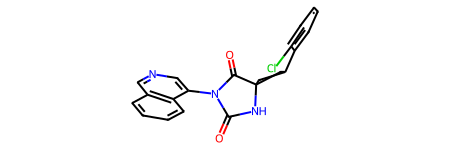

In [78]:
deserialized = Chem.Mol(base64.b64decode(y_pred_serialized[150].encode("ascii")))
deserialized

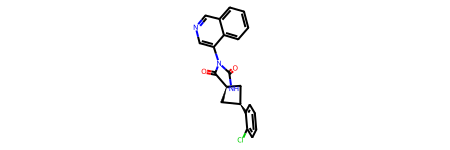

In [79]:
y_pred_t[150]

In [72]:
dm.same_mol(y_pred[151], deserialized)

True

# Submit to Polaris

In [73]:
competition.submit_predictions(
    predictions=y_pred_serialized,
    prediction_name="yzma-first-predictions-VINA-mmff94-25-fix152",
    prediction_owner="myzzzz",
    report_url="https://www.quantabricks.xyz", 
    # The below metadata is optional, but recommended.
    github_url="https://github.com/myzzzz6",
    description="Just testing the Polaris API here!",
    tags=["tutorial"],
    user_attributes={"Framework": "RDKit", "Method": "Dummy Baseline"}
)

[01:45:51]  Success: Submitting competition predictions                                               ]8;id=669278;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=339213;file:///home/xchen/miniconda3/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

For the ASAP competition, we will only evaluate your latest submission. 

The results will only be disclosed after the competition ends.

The End.